# Telecom Churn Case Study

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 

For many incumbent operators, retaining high profitable customers is the number one business goal.

 

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

 

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

## 1. Data Understanding and Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the data.
df = pd.read_csv('telecom_churn_data.csv')

In [3]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [4]:
pd.set_option('display.max_rows', len(df.columns))
pd.set_option("display.max_columns", len(df.columns))

In [5]:
df.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [6]:
df.shape

(99999, 226)

In [7]:
df.describe(include='all')

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999,99398,98899,98340,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000

In [8]:
df.mobile_number.nunique()

99999

In [9]:
df.circle_id.value_counts()

109    99999
Name: circle_id, dtype: int64

In [10]:
df['night_pck_user_6'].value_counts()

0.0    24522
1.0      631
Name: night_pck_user_6, dtype: int64

In [11]:
df['fb_user_6'].value_counts()

1.0    23000
0.0     2153
Name: fb_user_6, dtype: int64

- Columns that show no variance as it contains only one value.
    - 'circle_id','loc_og_t2o_mou', 'std_og_t2o_mou','loc_ic_t2o_mou', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9'
<br/>
<br/>
- Columns that has only two values(0 and 1) can be taken as a categorical column.
    -  'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9'
<br/>
<br/>

### Handling missing value

In [12]:
nullValues = round((df.isnull().sum()/len(df))*100, 2)
nullValues.loc[nullValues != 0]

loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou_6             3.94
loc_og_t2t_mou_7             3.86
loc_og_t2t_mou_8             5.38
loc_og_t2t_mou_9             7.75
loc_og_t2m_mou_6             3.94
loc_og_t2m_mou_7             3.86
loc_og_t2m_mou_8             5.38
loc_og_t2m_mou

In [13]:
#delete coloum as all value are zero or constant
df = df.drop(['circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','std_og_t2c_mou_6',
                     'std_og_t2c_mou_7','std_og_t2c_mou_8','std_og_t2c_mou_9','std_ic_t2o_mou_6','std_ic_t2o_mou_7',
                   'std_ic_t2o_mou_8','std_ic_t2o_mou_9','last_date_of_month_6','last_date_of_month_7',
              'last_date_of_month_8','last_date_of_month_9'], 1)

In [14]:
df.shape

(99999, 210)

In [15]:
cat_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'night_pck_user_9',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8',
             'fb_user_9'
            ]

# replace missing values with '-1' in categorical columns
df[cat_cols] = df[cat_cols].apply(lambda x: x.fillna(-1))

In the recharge variables where minumum value is 1, we can impute missing values with zeroes since it means customer didn't recharge their numbere that month.

In [16]:
recharge_impute = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9'
       ]

df[recharge_impute] = df[recharge_impute].apply(lambda x: x.fillna(0))

In [17]:
# Drop the columns which have more than 70% missing values.
MISSING_THRESHOLD = 0.7

include_cols = list(df.apply(lambda column: True if column.isnull().sum()/df.shape[0] < MISSING_THRESHOLD else False))


drop_missing = pd.DataFrame({'features':df.columns , 'include': include_cols})
drop_missing.loc[drop_missing.include == True,:]

,features,include
0,mobile_number,True
1,arpu_6,True
2,arpu_7,True
3,arpu_8,True
4,arpu_9,True
5,onnet_mou_6,True
6,onnet_mou_7,True
7,onnet_mou_8,True
8,onnet_mou_9,True
9,offnet_mou_6,True


In [18]:
df = df.loc[:, include_cols]

In [19]:
df.shape

(99999, 190)

In [20]:
nullValues = round((df.isnull().sum()/len(df))*100, 2)
nullValues.loc[nullValues != 0]

onnet_mou_6            3.94
onnet_mou_7            3.86
onnet_mou_8            5.38
onnet_mou_9            7.75
offnet_mou_6           3.94
offnet_mou_7           3.86
offnet_mou_8           5.38
offnet_mou_9           7.75
roam_ic_mou_6          3.94
roam_ic_mou_7          3.86
roam_ic_mou_8          5.38
roam_ic_mou_9          7.75
roam_og_mou_6          3.94
roam_og_mou_7          3.86
roam_og_mou_8          5.38
roam_og_mou_9          7.75
loc_og_t2t_mou_6       3.94
loc_og_t2t_mou_7       3.86
loc_og_t2t_mou_8       5.38
loc_og_t2t_mou_9       7.75
loc_og_t2m_mou_6       3.94
loc_og_t2m_mou_7       3.86
loc_og_t2m_mou_8       5.38
loc_og_t2m_mou_9       7.75
loc_og_t2f_mou_6       3.94
loc_og_t2f_mou_7       3.86
loc_og_t2f_mou_8       5.38
loc_og_t2f_mou_9       7.75
loc_og_t2c_mou_6       3.94
loc_og_t2c_mou_7       3.86
loc_og_t2c_mou_8       5.38
loc_og_t2c_mou_9       7.75
loc_og_mou_6           3.94
loc_og_mou_7           3.86
loc_og_mou_8           5.38
loc_og_mou_9        

In [21]:
# Impute the date varibales with the mode.
date_columns = ['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9']

for col in date_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [22]:
# Imputing the rest of the missing value with the median.
missing_cols = df.columns[df.isnull().sum()>0]

for col in missing_cols:
    df[col].fillna((df[col].median()), inplace=True)

In [23]:
nullValues = round((df.isnull().sum()/len(df))*100, 2)
nullValues.loc[nullValues != 0]

Series([], dtype: float64)

In [24]:
df.info(verbose = 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 190 columns):
 #   Column               Dtype  
---  ------               -----  
 0   mobile_number        int64  
 1   arpu_6               float64
 2   arpu_7               float64
 3   arpu_8               float64
 4   arpu_9               float64
 5   onnet_mou_6          float64
 6   onnet_mou_7          float64
 7   onnet_mou_8          float64
 8   onnet_mou_9          float64
 9   offnet_mou_6         float64
 10  offnet_mou_7         float64
 11  offnet_mou_8         float64
 12  offnet_mou_9         float64
 13  roam_ic_mou_6        float64
 14  roam_ic_mou_7        float64
 15  roam_ic_mou_8        float64
 16  roam_ic_mou_9        float64
 17  roam_og_mou_6        float64
 18  roam_og_mou_7        float64
 19  roam_og_mou_8        float64
 20  roam_og_mou_9        float64
 21  loc_og_t2t_mou_6     float64
 22  loc_og_t2t_mou_7     float64
 23  loc_og_t2t_mou_8     float64
 24  l

In [25]:
df['date_of_last_rech_6'] = pd.to_datetime(df.date_of_last_rech_6).dt.day
df['date_of_last_rech_7'] = pd.to_datetime(df.date_of_last_rech_7).dt.day
df['date_of_last_rech_8'] = pd.to_datetime(df.date_of_last_rech_8).dt.day
df['date_of_last_rech_9'] = pd.to_datetime(df.date_of_last_rech_8).dt.day

### Filtering High value customers

In [26]:
# calculate the total data recharge amount for June and July --> number of recharges * average recharge amount
df['total_data_rech_6'] = df.total_rech_data_6 * df.av_rech_amt_data_6
df['total_data_rech_7'] = df.total_rech_data_7 * df.av_rech_amt_data_7

In [27]:
# calculate total recharge amount for June and July --> call recharge amount + data recharge amount
df['amt_data_6'] = df.total_rech_amt_6 + df.total_data_rech_6
df['amt_data_7'] = df.total_rech_amt_7 + df.total_data_rech_7

In [28]:
# calculate average recharge done by customer in June and July
df['av_amt_data_6_7'] = (df.amt_data_6 + df.amt_data_7)/2

In [29]:
# look at the 70th percentile recharge amount
print("Recharge amount at 70th percentile: {0}".format(df.av_amt_data_6_7.quantile(0.7)))

Recharge amount at 70th percentile: 478.0


In [30]:
# retain only those customers who have recharged their mobiles with more than or equal to 70th percentile amount
df1 = df.loc[df.av_amt_data_6_7 >= df.av_amt_data_6_7.quantile(0.7), :]
df1 = df1.reset_index(drop=True)
df1.shape

(30001, 195)

In [31]:
# delete variables created to filter high-value customers
df1 = df1.drop(['total_data_rech_6', 'total_data_rech_7',
                                      'amt_data_6', 'amt_data_7', 'av_amt_data_6_7'], axis=1)
df1.shape

(30001, 190)

### Derive churn

In [32]:
# calculate total incoming and outgoing minutes of usage
df1['total_calls_mou_9'] = df1.total_ic_mou_9 + df1.total_og_mou_9

In [33]:
# calculate 2g and 3g data consumption
df1['total_internet_mb_9'] =  df1.vol_2g_mb_9 + df1.vol_3g_mb_9

In [34]:
# create churn variable: those who have not used either calls or internet in the month of September are customers who have churned

# 0 - not churn, 1 - churn
df1['churn'] = df1.apply(lambda row: 1 if (row.total_calls_mou_9 == 0 and row.total_internet_mb_9 == 0) else 0, axis=1)

In [35]:
# delete derived variables
df1 = df1.drop(['total_calls_mou_9', 'total_internet_mb_9'], axis=1)

In [36]:
# change data type to category
df1.churn = df1.churn.astype("category")

In [37]:
# print churn ratio
print("Churn Ratio:")
print(df1.churn.value_counts()*100/df1.shape[0])

Churn Ratio:
0    91.863605
1     8.136395
Name: churn, dtype: float64


### Outlier Treatment

In [38]:
df1.describe(percentiles=[0.01, 0.10,.25,.5,.75,.90,.95,.99])

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,3.000100e+04,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.00000

As we can see we have outlier.

In [39]:
cols = [col for col in df1.columns if col not in ['churn','mobile_number']]

for col in cols:
    percentiles = df1[col].quantile([0.01,0.99]).values
    df1[col][df1[col] <= percentiles[0]] = percentiles[0]
    df1[col][df1[col] >= percentiles[1]] = percentiles[1]

### Derive new features

Let's derive some variables. The most important feature, in this situation, can be the difference between the 8th month and the previous months. The difference can be in patterns such as usage difference or recharge value difference. Let's calculate difference variable as the difference between 8th month and the average of 6th and 7th month.

In [40]:
df1['arpu_diff'] = df1.arpu_8 - ((df1.arpu_6 + df1.arpu_7)/2)

df1['onnet_mou_diff'] = df1.onnet_mou_8 - ((df1.onnet_mou_6 + df1.onnet_mou_7)/2)

df1['offnet_mou_diff'] = df1.offnet_mou_8 - ((df1.offnet_mou_6 + df1.offnet_mou_7)/2)

df1['roam_ic_mou_diff'] = df1.roam_ic_mou_8 - ((df1.roam_ic_mou_6 + df1.roam_ic_mou_7)/2)

df1['roam_og_mou_diff'] = df1.roam_og_mou_8 - ((df1.roam_og_mou_6 + df1.roam_og_mou_7)/2)

df1['loc_og_mou_diff'] = df1.loc_og_mou_8 - ((df1.loc_og_mou_6 + df1.loc_og_mou_7)/2)

df1['std_og_mou_diff'] = df1.std_og_mou_8 - ((df1.std_og_mou_6 + df1.std_og_mou_7)/2)

df1['isd_og_mou_diff'] = df1.isd_og_mou_8 - ((df1.isd_og_mou_6 + df1.isd_og_mou_7)/2)

df1['spl_og_mou_diff'] = df1.spl_og_mou_8 - ((df1.spl_og_mou_6 + df1.spl_og_mou_7)/2)

df1['total_og_mou_diff'] = df1.total_og_mou_8 - ((df1.total_og_mou_6 + df1.total_og_mou_7)/2)

df1['loc_ic_mou_diff'] = df1.loc_ic_mou_8 - ((df1.loc_ic_mou_6 + df1.loc_ic_mou_7)/2)

df1['std_ic_mou_diff'] = df1.std_ic_mou_8 - ((df1.std_ic_mou_6 + df1.std_ic_mou_7)/2)

df1['isd_ic_mou_diff'] = df1.isd_ic_mou_8 - ((df1.isd_ic_mou_6 + df1.isd_ic_mou_7)/2)

df1['spl_ic_mou_diff'] = df1.spl_ic_mou_8 - ((df1.spl_ic_mou_6 + df1.spl_ic_mou_7)/2)

df1['total_ic_mou_diff'] = df1.total_ic_mou_8 - ((df1.total_ic_mou_6 + df1.total_ic_mou_7)/2)

df1['total_rech_num_diff'] = df1.total_rech_num_8 - ((df1.total_rech_num_6 + df1.total_rech_num_7)/2)

df1['total_rech_amt_diff'] = df1.total_rech_amt_8 - ((df1.total_rech_amt_6 + df1.total_rech_amt_7)/2)

df1['max_rech_amt_diff'] = df1.max_rech_amt_8 - ((df1.max_rech_amt_6 + df1.max_rech_amt_7)/2)

df1['total_rech_data_diff'] = df1.total_rech_data_8 - ((df1.total_rech_data_6 + df1.total_rech_data_7)/2)

df1['max_rech_data_diff'] = df1.max_rech_data_8 - ((df1.max_rech_data_6 + df1.max_rech_data_7)/2)

df1['av_rech_amt_data_diff'] = df1.av_rech_amt_data_8 - ((df1.av_rech_amt_data_6 + df1.av_rech_amt_data_7)/2)

df1['vol_2g_mb_diff'] = df1.vol_2g_mb_8 - ((df1.vol_2g_mb_6 + df1.vol_2g_mb_7)/2)

df1['vol_3g_mb_diff'] = df1.vol_3g_mb_8 - ((df1.vol_3g_mb_6 + df1.vol_3g_mb_7)/2)


- As per the analysis scope dropping all the variables of the 9th month after the churn indicator creation

In [41]:
# delete all variables relating to 9th month
df1 = df1.filter(regex='[^9]$', axis=1)
df1.shape

(30001, 168)

- The AON variable was used to create tenure buckets. It was observed larger the tenure, lesser was the churn - as customers who are newly acquired to the network churned more as compared to the old customers.

In [42]:
df1['tenure_buck'] = np.round(df1['aon']/365,1)
bins = [0, 1, 2, 3, 4, 10]
df1['tenure_buck'] = pd.cut(df1['tenure_buck'], bins)
df1['tenure_buck'].value_counts()

(4, 10]    8978
(1, 2]     7819
(0, 1]     5789
(2, 3]     4496
(3, 4]     2919
Name: tenure_buck, dtype: int64

In [43]:
df1.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 169 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   mobile_number          int64   
 1   arpu_6                 float64 
 2   arpu_7                 float64 
 3   arpu_8                 float64 
 4   onnet_mou_6            float64 
 5   onnet_mou_7            float64 
 6   onnet_mou_8            float64 
 7   offnet_mou_6           float64 
 8   offnet_mou_7           float64 
 9   offnet_mou_8           float64 
 10  roam_ic_mou_6          float64 
 11  roam_ic_mou_7          float64 
 12  roam_ic_mou_8          float64 
 13  roam_og_mou_6          float64 
 14  roam_og_mou_7          float64 
 15  roam_og_mou_8          float64 
 16  loc_og_t2t_mou_6       float64 
 17  loc_og_t2t_mou_7       float64 
 18  loc_og_t2t_mou_8       float64 
 19  loc_og_t2m_mou_6       float64 
 20  loc_og_t2m_mou_7       float64 
 21  loc_og_t2m_mou_8       float64 
 2

### Correlation Analysis

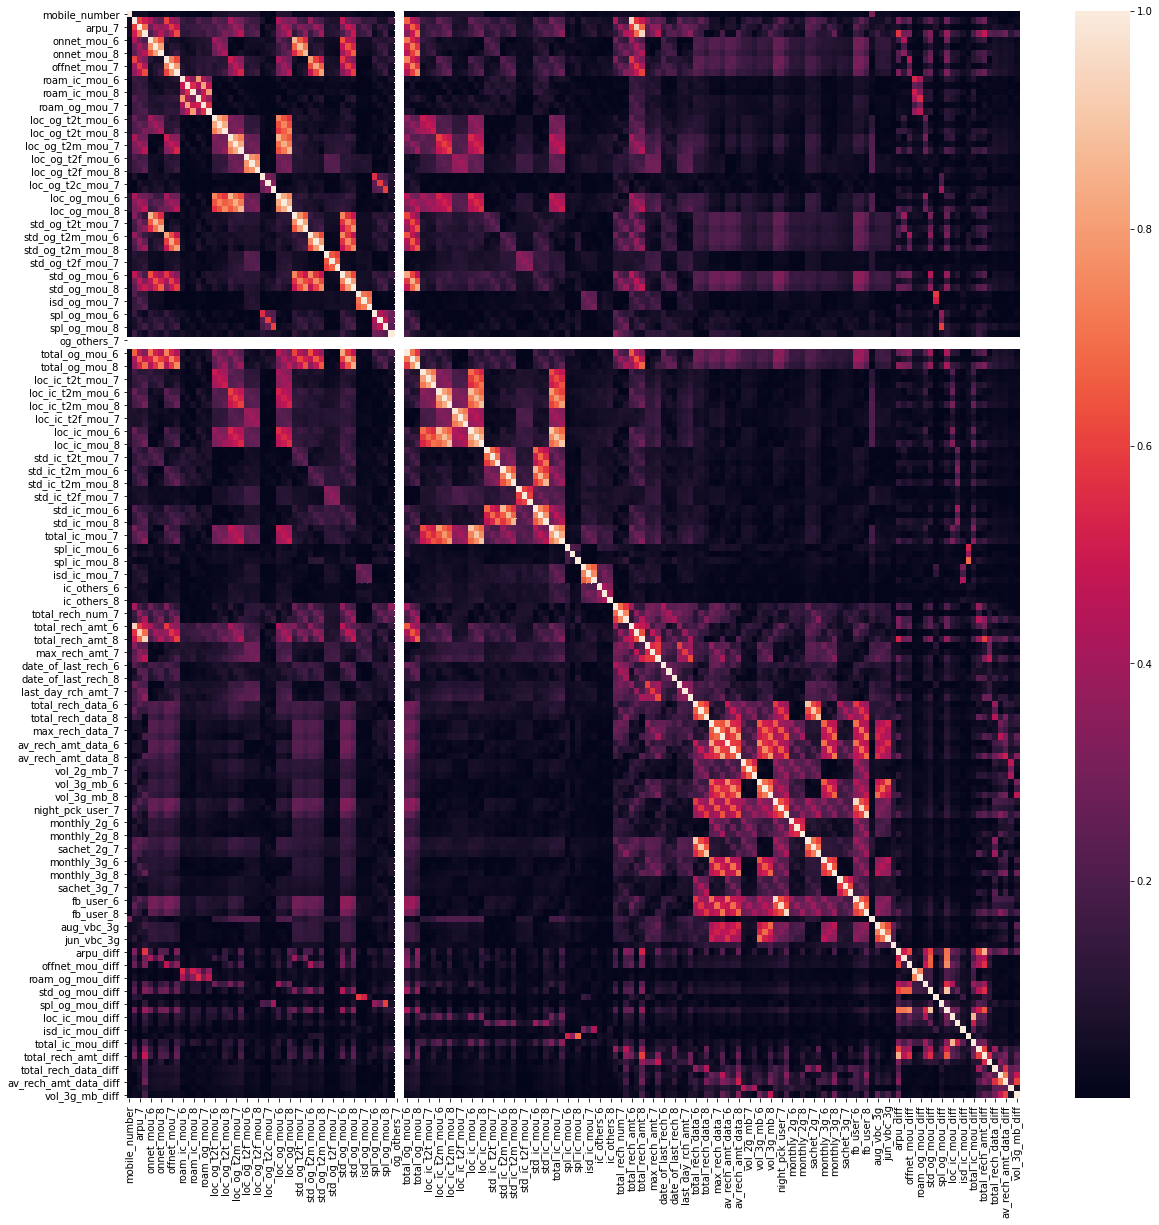

In [44]:
corr_matrix = df1.corr().abs()

import seaborn as sb
plt.figure(figsize = [20,20])
sb.heatmap(corr_matrix)

In [45]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.75
to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]
print(to_drop)

df1 = df1.drop(to_drop, 1)

['onnet_mou_7', 'onnet_mou_8', 'offnet_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'isd_ic_mou_8', 'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'sachet_2g_6', 'sachet_2g_7', 'sach

In [46]:
df1.info(verbose = 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 107 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   mobile_number          int64   
 1   arpu_6                 float64 
 2   arpu_7                 float64 
 3   arpu_8                 float64 
 4   onnet_mou_6            float64 
 5   offnet_mou_6           float64 
 6   offnet_mou_7           float64 
 7   roam_ic_mou_6          float64 
 8   roam_ic_mou_7          float64 
 9   roam_ic_mou_8          float64 
 10  loc_og_t2t_mou_6       float64 
 11  loc_og_t2m_mou_6       float64 
 12  loc_og_t2f_mou_6       float64 
 13  loc_og_t2c_mou_6       float64 
 14  loc_og_t2c_mou_7       float64 
 15  loc_og_t2c_mou_8       float64 
 16  std_og_t2f_mou_6       float64 
 17  std_og_t2f_mou_7       float64 
 18  std_og_t2f_mou_8       float64 
 19  isd_og_mou_6           float64 
 20  isd_og_mou_7           float64 
 21  isd_og_mou_8           float64 
 2

In [47]:
#create dummy for tenure_buck 
df_dummy = pd.get_dummies(df1['tenure_buck'], drop_first=True)

In [48]:
df_dummy.columns = ['tenure_buck_1_to_2','tenure_buck_2_to_3','tenure_buck_3_to_4','tenure_buck_4_to_10']

In [49]:
df_dummy.info(verbose = 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   tenure_buck_1_to_2   30001 non-null  uint8
 1   tenure_buck_2_to_3   30001 non-null  uint8
 2   tenure_buck_3_to_4   30001 non-null  uint8
 3   tenure_buck_4_to_10  30001 non-null  uint8
dtypes: uint8(4)
memory usage: 117.3 KB


In [50]:
df1 = pd.concat([df1, df_dummy], axis = 1)

In [51]:
df1 = df1.drop(['tenure_buck'], 1)

In [52]:
df1.shape

(30001, 110)

In [53]:
df1.info(verbose = 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 110 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   mobile_number          int64   
 1   arpu_6                 float64 
 2   arpu_7                 float64 
 3   arpu_8                 float64 
 4   onnet_mou_6            float64 
 5   offnet_mou_6           float64 
 6   offnet_mou_7           float64 
 7   roam_ic_mou_6          float64 
 8   roam_ic_mou_7          float64 
 9   roam_ic_mou_8          float64 
 10  loc_og_t2t_mou_6       float64 
 11  loc_og_t2m_mou_6       float64 
 12  loc_og_t2f_mou_6       float64 
 13  loc_og_t2c_mou_6       float64 
 14  loc_og_t2c_mou_7       float64 
 15  loc_og_t2c_mou_8       float64 
 16  std_og_t2f_mou_6       float64 
 17  std_og_t2f_mou_7       float64 
 18  std_og_t2f_mou_8       float64 
 19  isd_og_mou_6           float64 
 20  isd_og_mou_7           float64 
 21  isd_og_mou_8           float64 
 2

In [54]:
df1.describe(include='all')

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2f_mou_6,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_rech_num_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff,tenure_buck_1_to_2,tenure_buck_2_to_3,tenure_buck_3_to_4,tenure_buck_4_to_10
count,3.000100e+04,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.0,30001.0,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.00000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.0,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.00000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [55]:
# After outlier treatment droping column which don't have much variance or zero variance
df1 = df1.drop(['og_others_7','og_others_8','spl_ic_mou_6','spl_ic_mou_7','spl_ic_mou_8','aon'], 1)

In [56]:
df1.shape

(30001, 104)

### Data Exploration

In [57]:
df1.info(verbose = 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 104 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   mobile_number          int64   
 1   arpu_6                 float64 
 2   arpu_7                 float64 
 3   arpu_8                 float64 
 4   onnet_mou_6            float64 
 5   offnet_mou_6           float64 
 6   offnet_mou_7           float64 
 7   roam_ic_mou_6          float64 
 8   roam_ic_mou_7          float64 
 9   roam_ic_mou_8          float64 
 10  loc_og_t2t_mou_6       float64 
 11  loc_og_t2m_mou_6       float64 
 12  loc_og_t2f_mou_6       float64 
 13  loc_og_t2c_mou_6       float64 
 14  loc_og_t2c_mou_7       float64 
 15  loc_og_t2c_mou_8       float64 
 16  std_og_t2f_mou_6       float64 
 17  std_og_t2f_mou_7       float64 
 18  std_og_t2f_mou_8       float64 
 19  isd_og_mou_6           float64 
 20  isd_og_mou_7           float64 
 21  isd_og_mou_8           float64 
 2

In [58]:
num_col = df1.select_dtypes(include=['float64','int64'])
num_col.describe()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2f_mou_6,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,isd_ic_mou_6,isd_ic_mou_7,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_rech_num_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
count,3.000100e+04,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.00000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.00000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,7.001206e+09,548.809784,551.084737,498.243103,252.789313,367.642652,371.158997,13.572928,9.636307,9.763929,76.493049,158.410941,5.643210,1.362552,1.575163,1.481738,1.274549,1.240659,1.098446,0.693781,0.691429,0.488093,5.261622,6.396756,5.806187,0.581238,59.428608,146.183470,13.794546,11.660813,12.285258,11.042725,25.422355,26.52955,23.915697,1.968113,2.065617,1.821622,7.656203,8.448850,0.677667,0.879645,0.729986,11.706443,11.583514,166.714843,169.124896,157.216026,26.505783,27.313356,26.796107,96.749808,96.564848,87.902837,1.621213,1.802607,1.559248,75.945568,77.590880,70.657511,119.124600,117.212448,98.017343,-0.427919,-0.418953,-0.456885,0.173094,0.181627,0.151895,0.208760,0.216326,0.201260,0.172461,0.192027,0.155628,160.497302,169.690165,149.463829,5.913960,-51.704157,-29.833944,-40.756245,-1.840688,-3.725471,-17.013470,-49.344909,-0.204512,-0.023002,-6.979617,-3.448507,-0.212744,-0.01293,-1.806506,-10.703843,-0.152662,-6.110713,-12.199958,-20.151181,-5.503490
std,6.908784e+05,358.130151,360.433210,383.295094,403.146559,432.915067,442.717224,49.336952,38.699269,38.946961,149.788634,212.080219,13.745878,3.999325,4.502008,4.394694,5.314243,5.235892,4.699991,4.394144,4.337086,3.244853

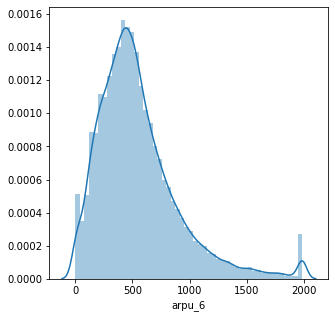

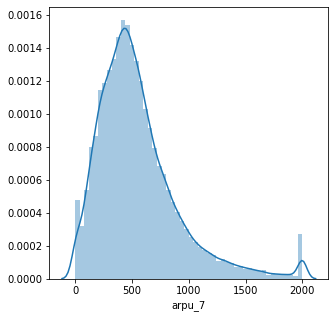

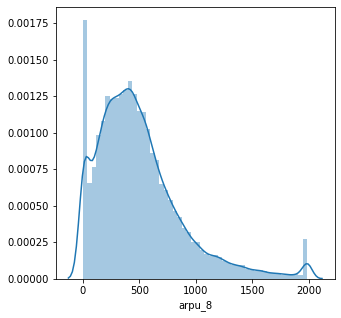

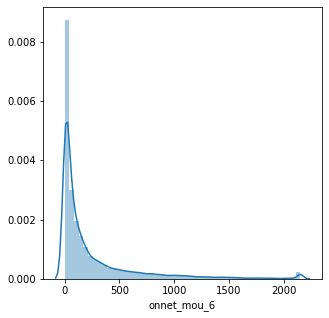

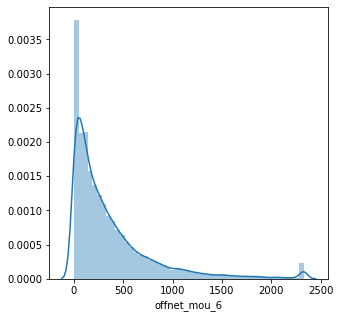

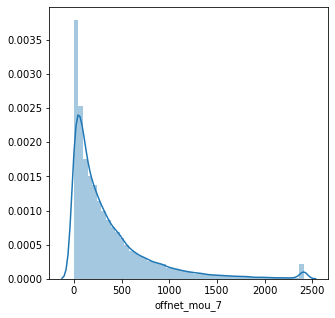

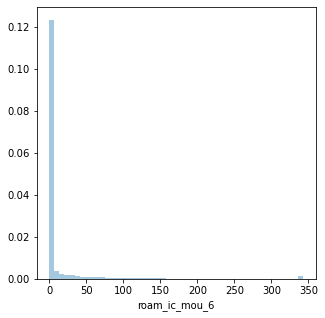

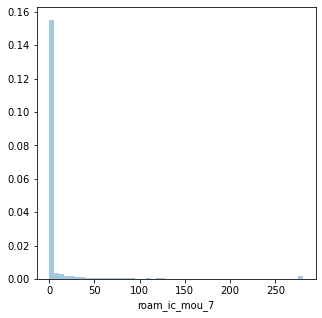

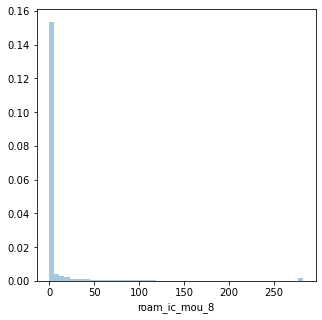

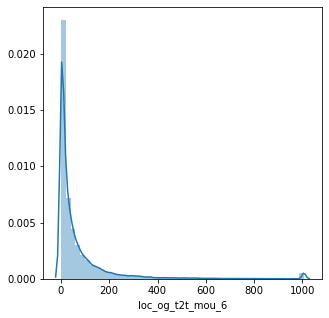

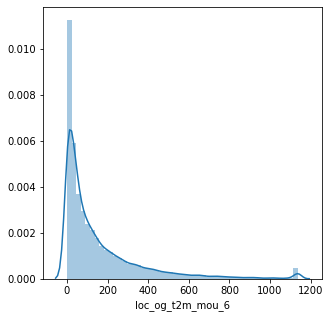

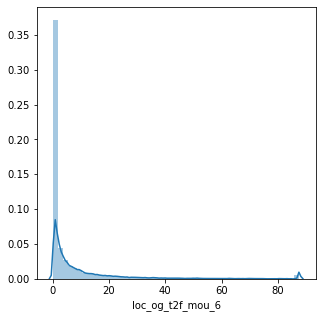

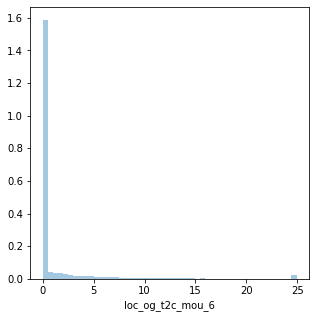

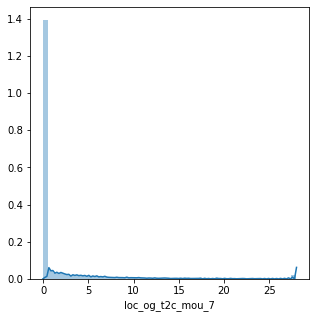

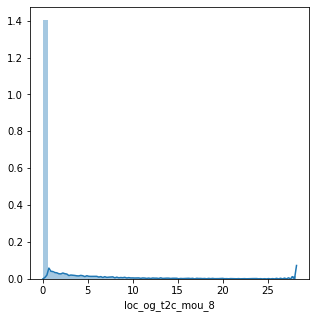

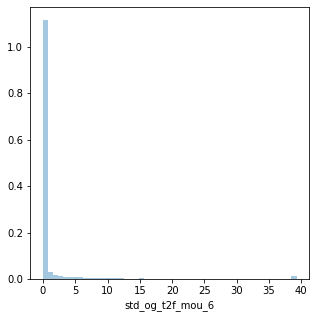

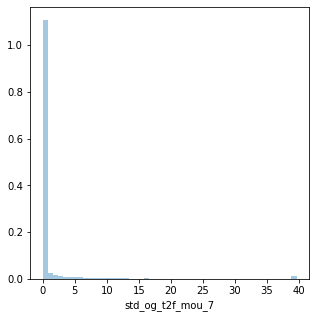

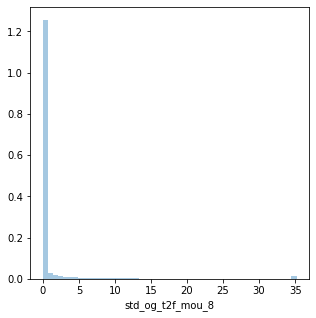

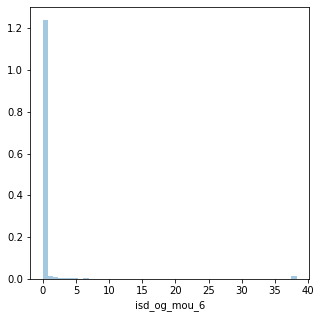

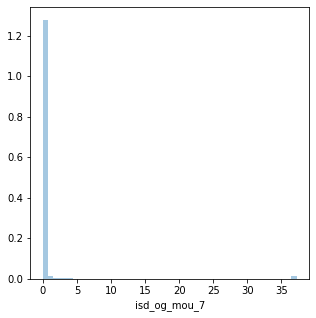

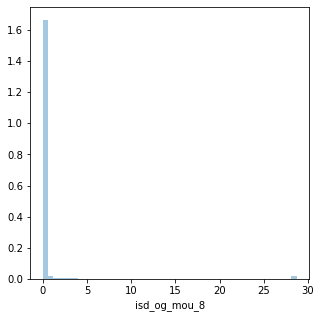

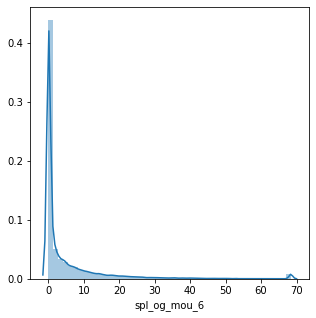

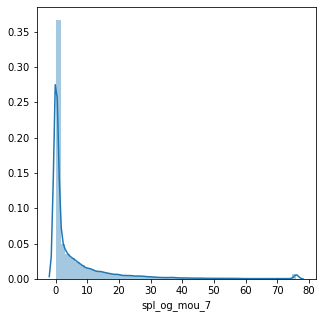

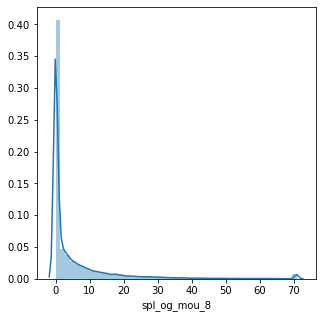

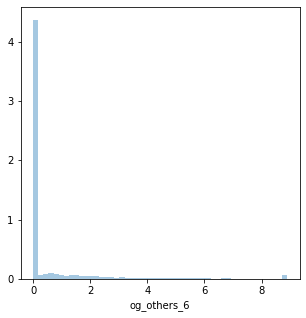

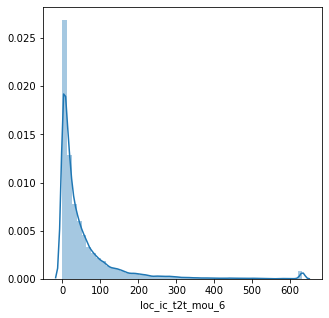

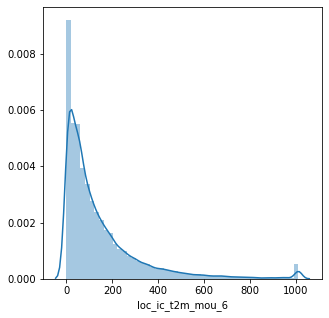

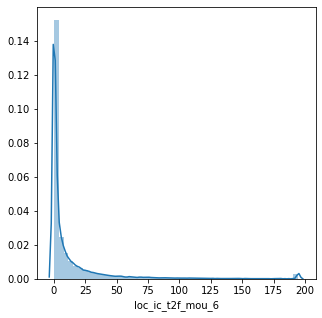

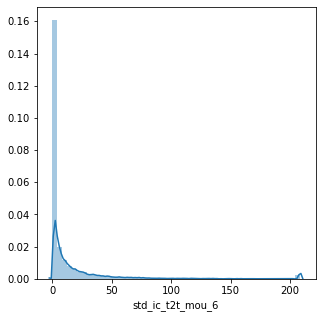

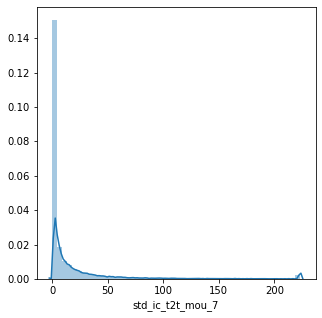

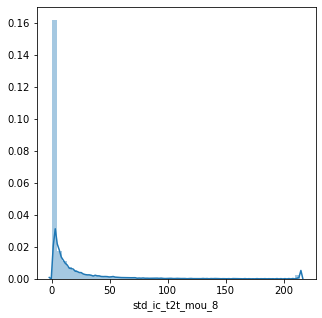

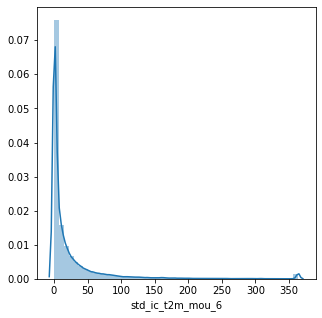

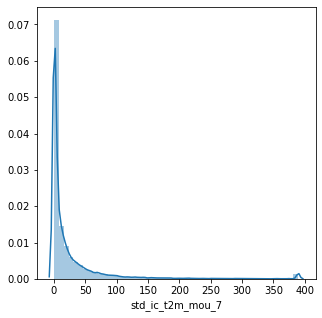

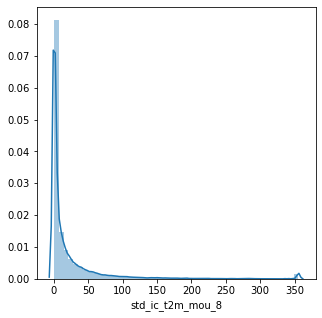

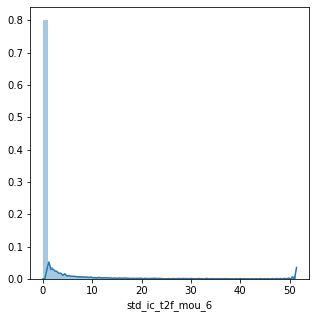

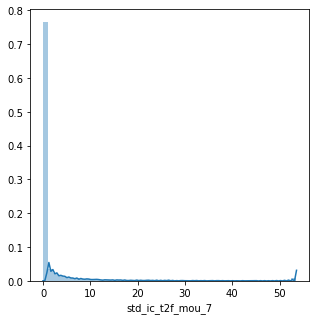

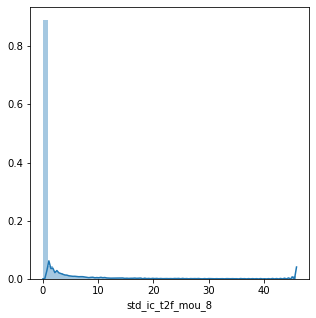

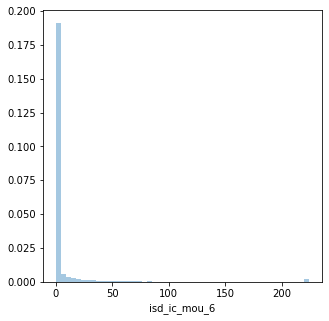

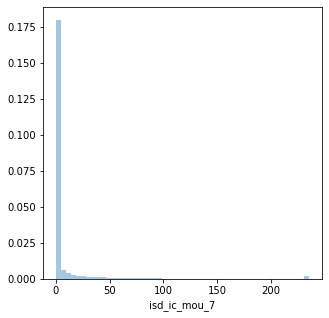

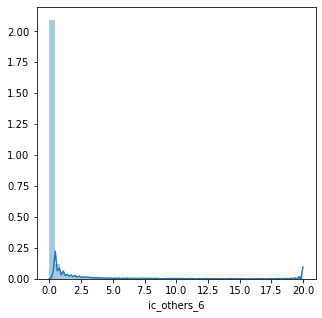

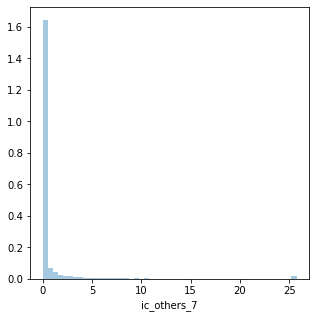

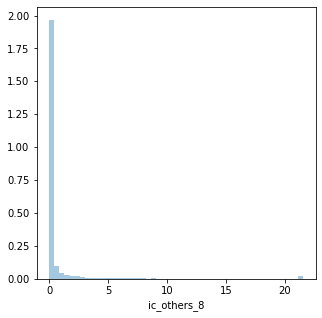

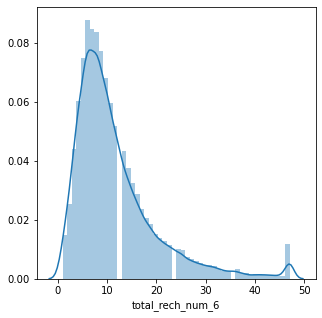

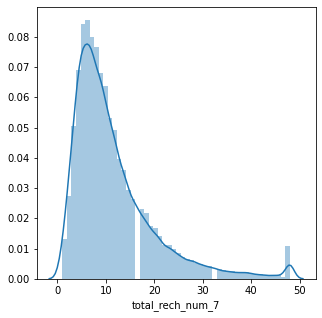

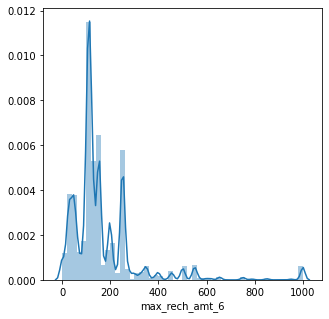

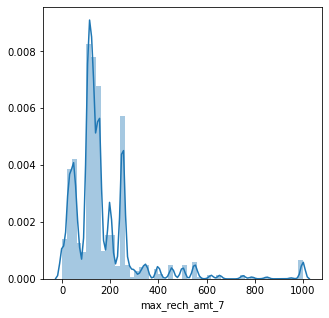

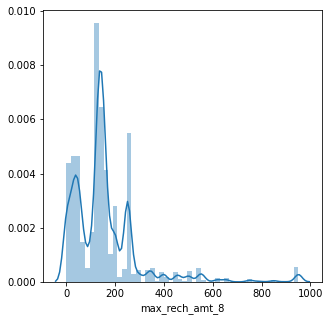

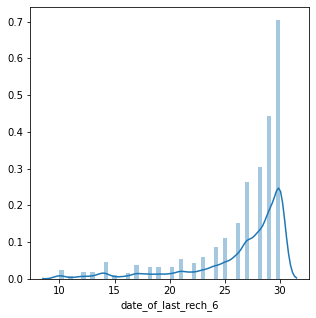

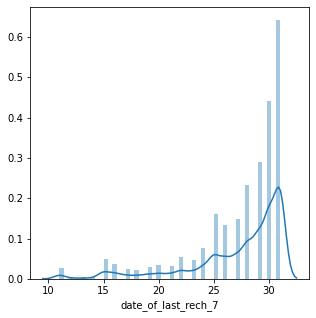

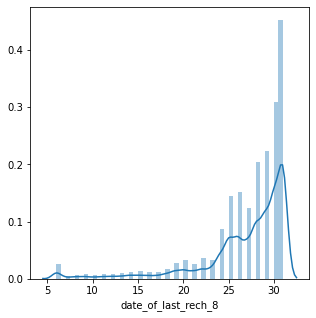

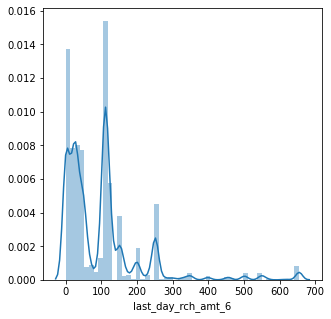

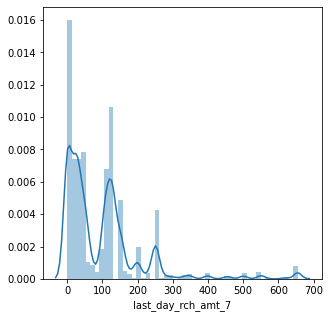

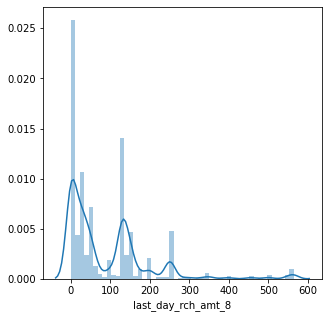

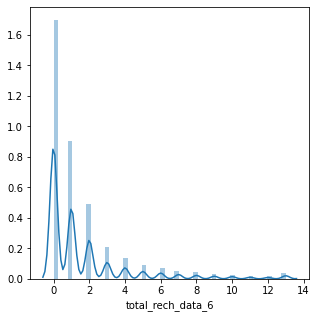

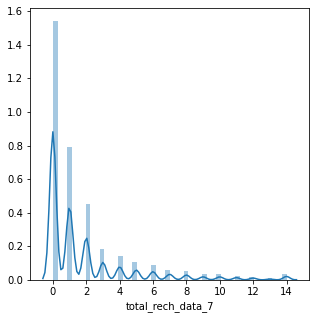

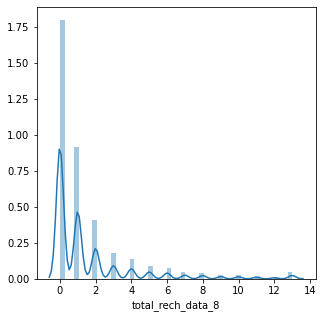

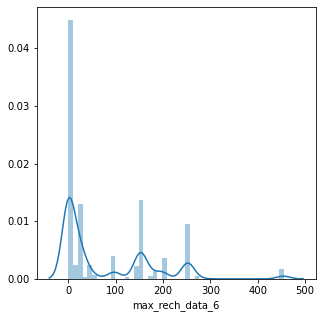

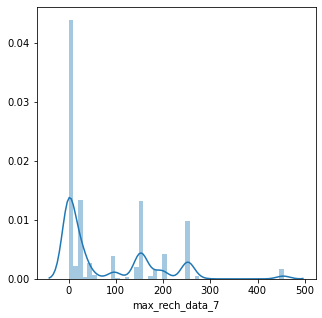

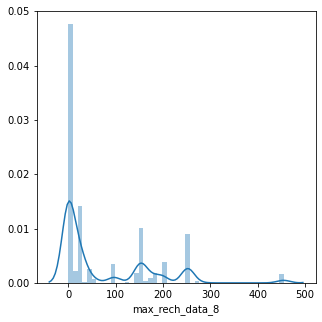

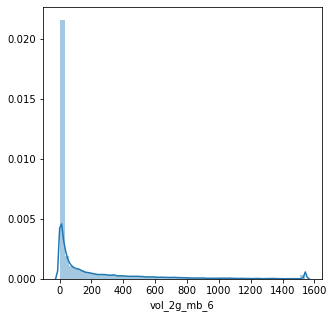

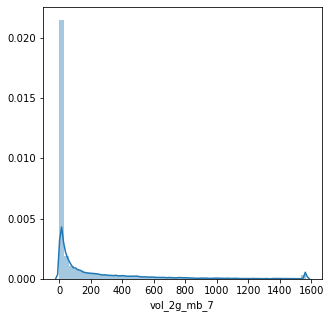

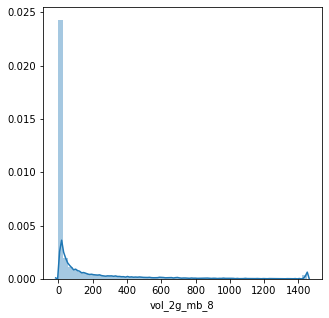

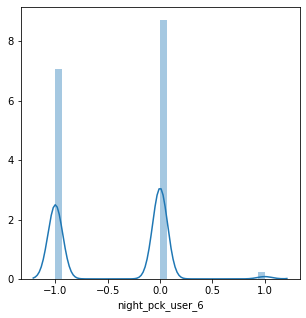

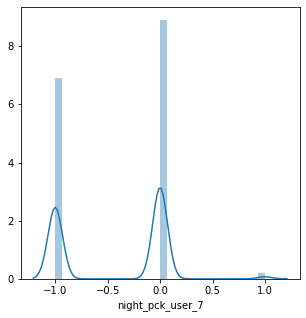

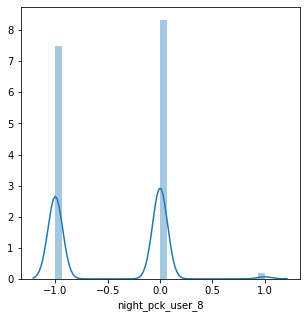

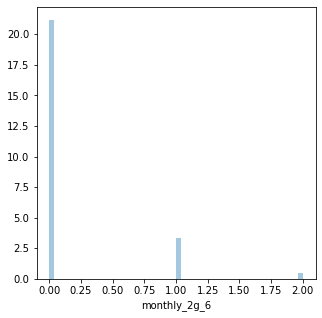

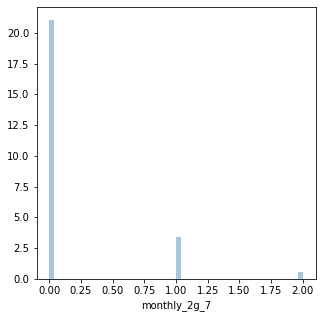

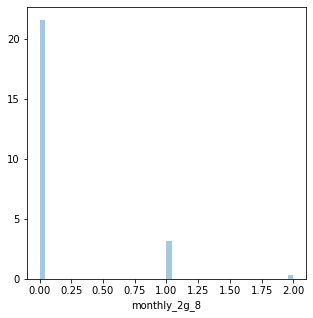

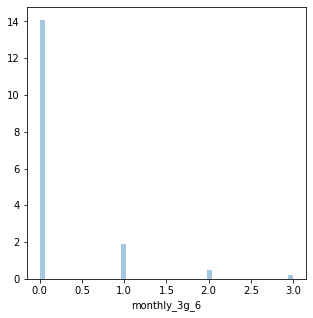

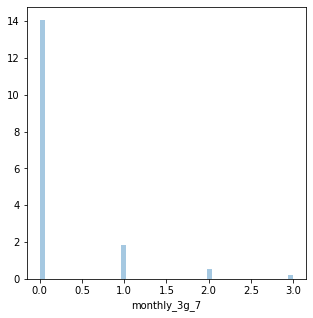

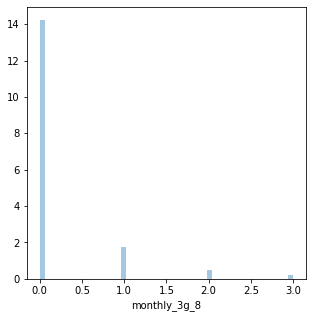

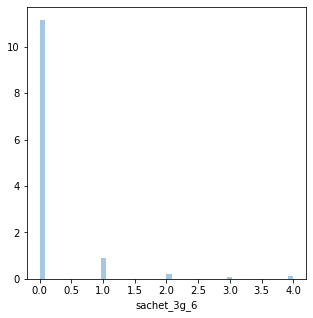

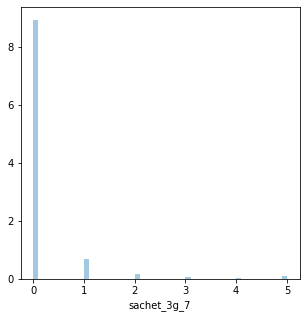

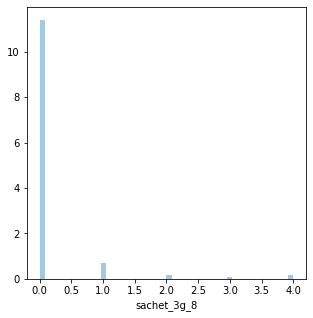

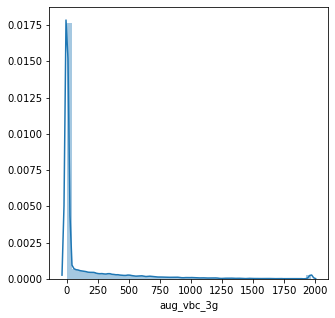

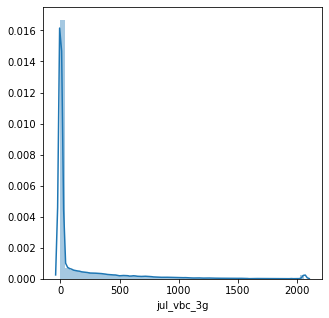

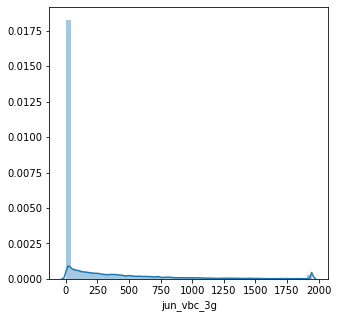

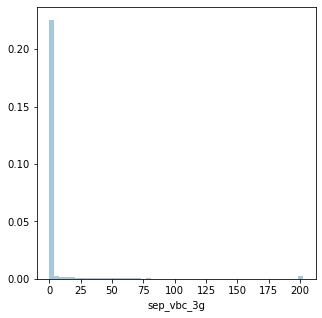

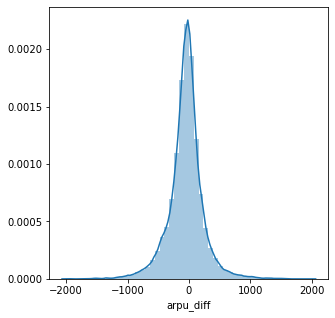

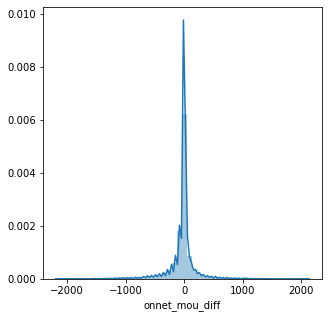

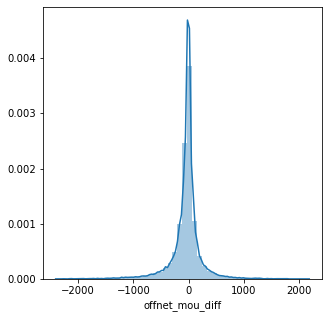

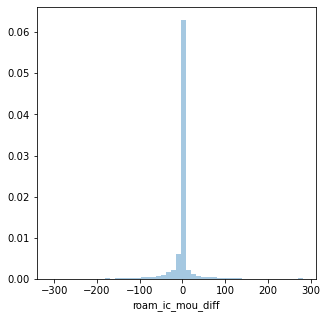

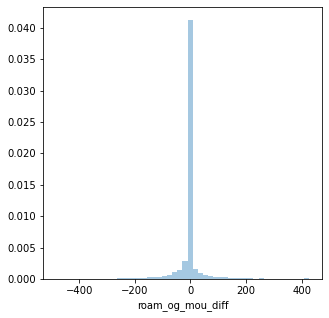

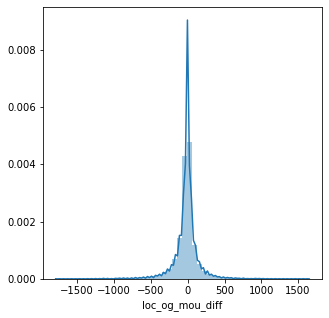

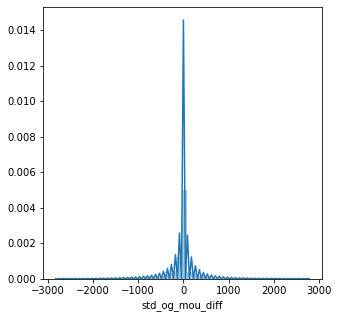

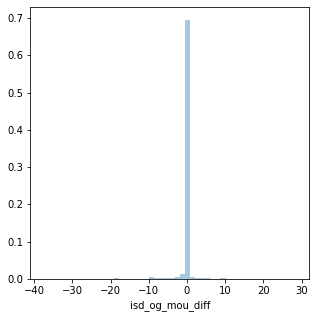

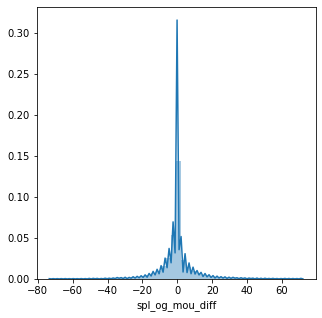

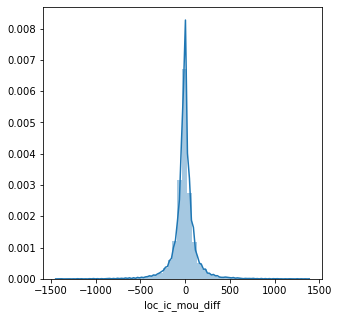

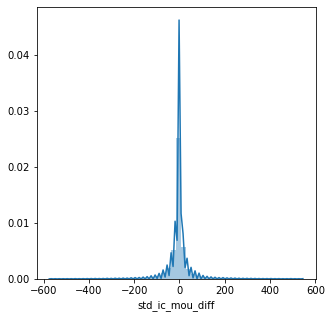

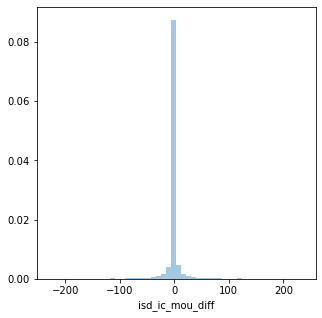

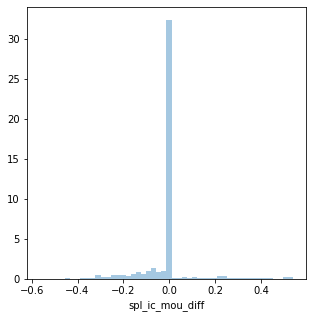

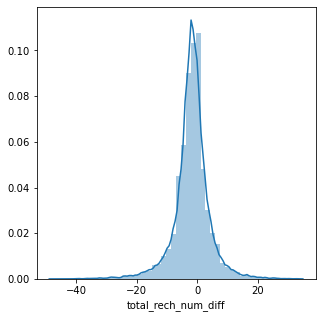

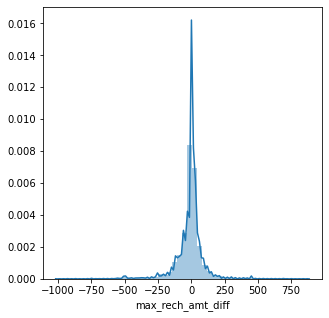

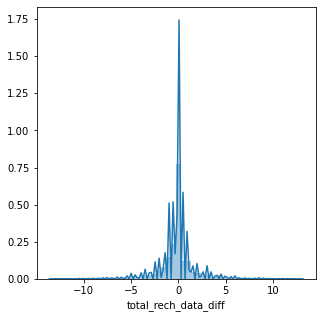

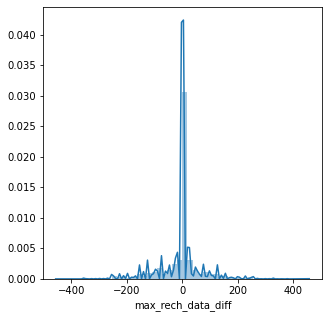

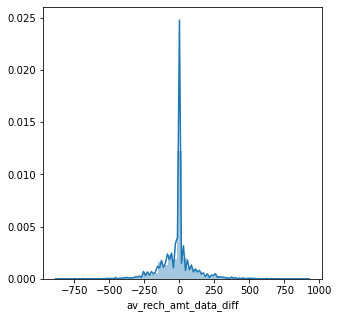

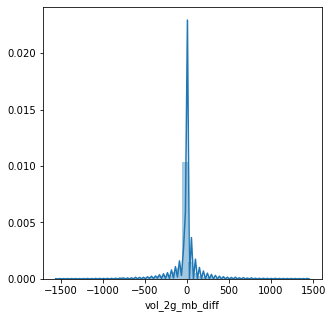

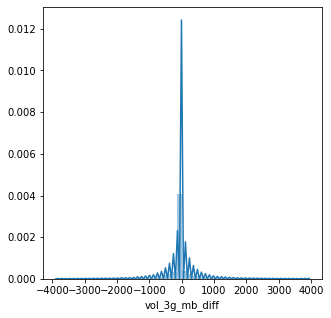

In [59]:
num_col = num_col.columns.tolist()
num_col.remove('mobile_number')
for col in num_col:
    plt.figure(figsize=(5, 5))
    sb.distplot(df1[col])

- Most of the variables are left skewed.

In [60]:
cat_col = df1.select_dtypes(exclude = ['float64','int64'])
cat_col = cat_col.columns.tolist()
cat_col

['churn',
 'tenure_buck_1_to_2',
 'tenure_buck_2_to_3',
 'tenure_buck_3_to_4',
 'tenure_buck_4_to_10']

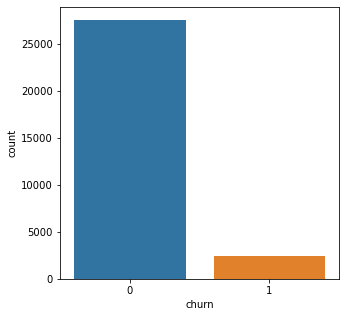

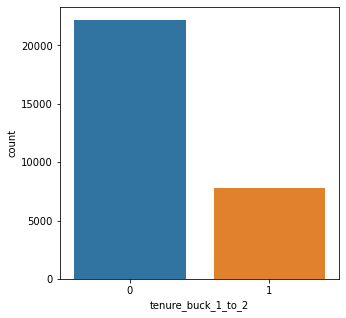

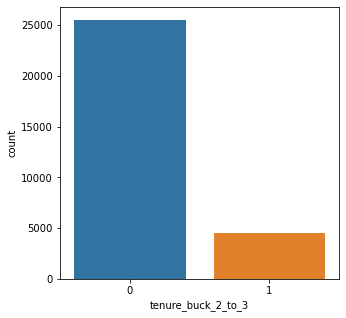

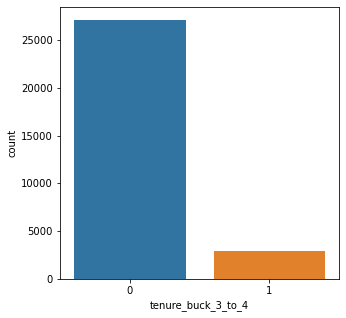

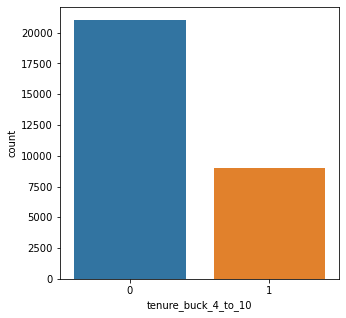

In [61]:
for col in cat_col:
    plt.figure(figsize=(5, 5))
    sb.countplot(df1[col])

- Data is skewed to non-churn customers.

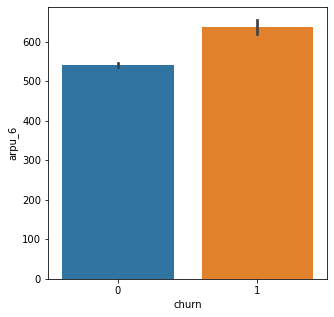

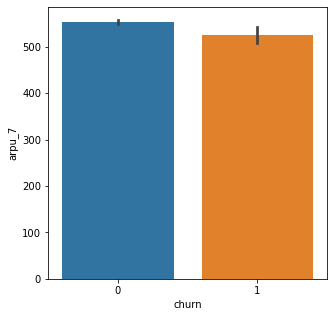

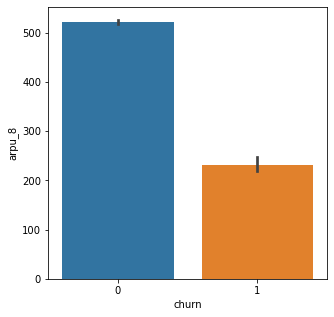

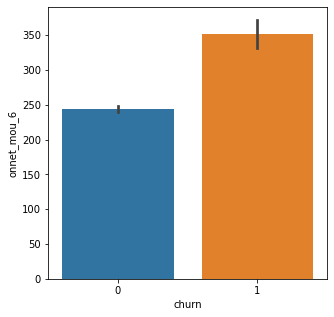

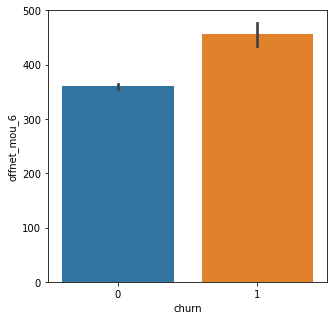

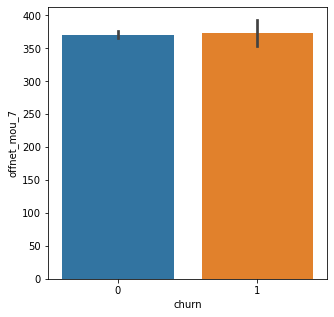

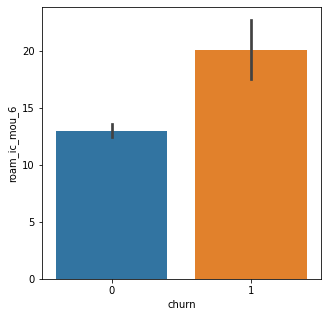

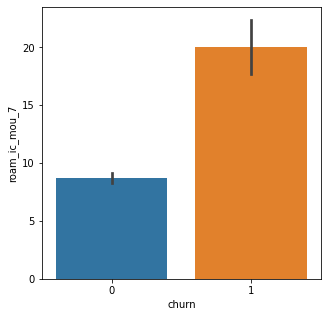

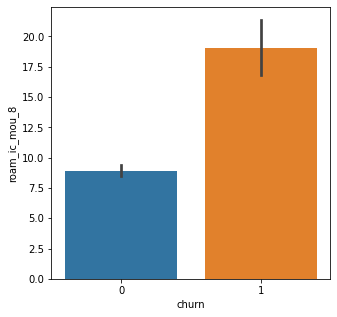

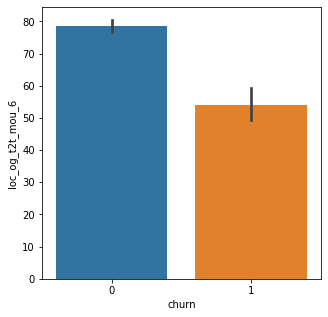

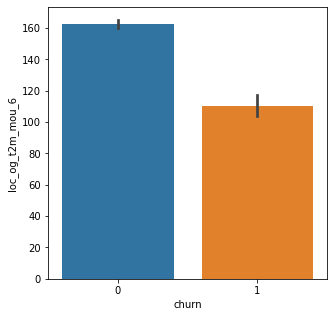

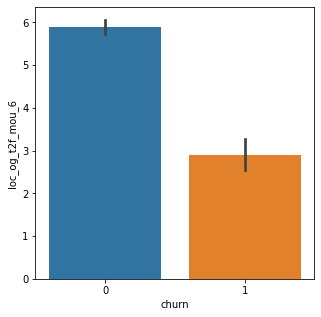

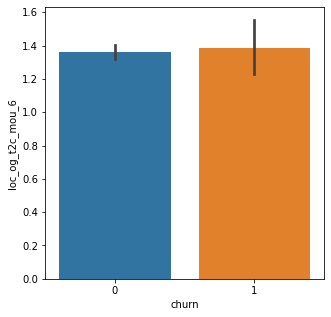

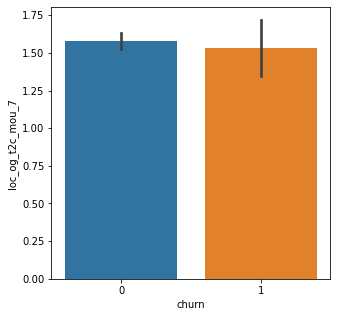

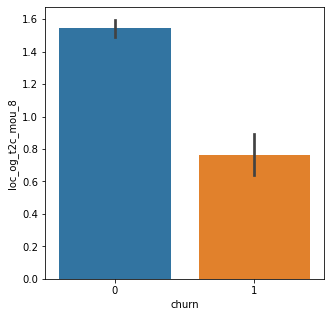

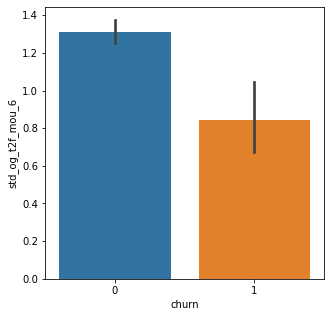

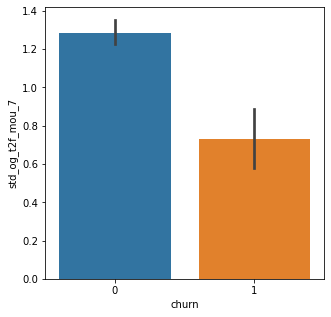

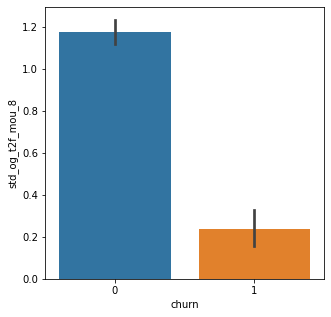

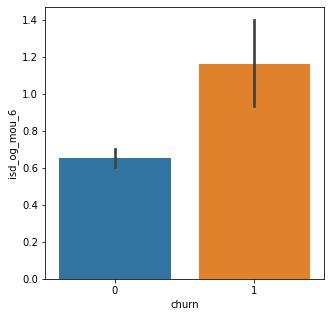

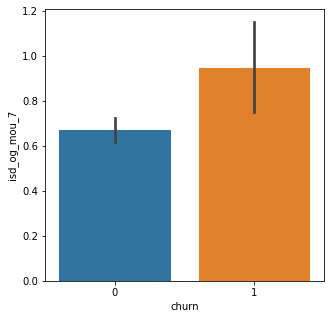

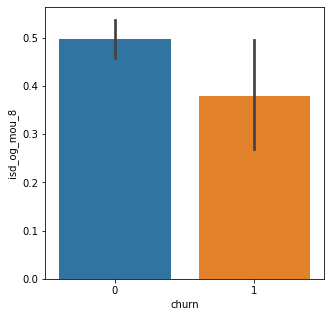

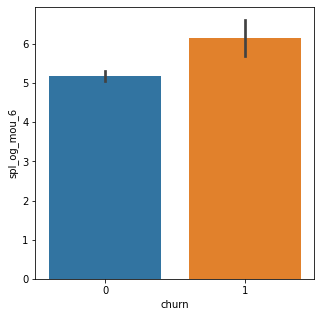

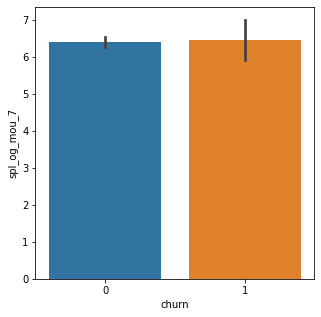

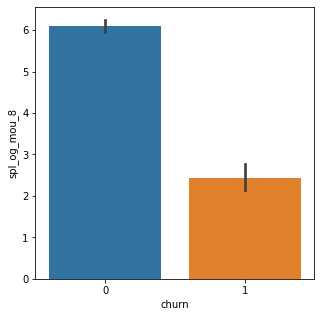

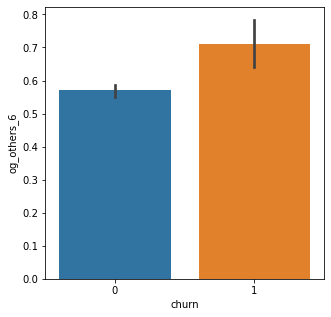

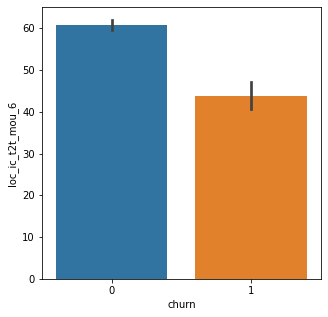

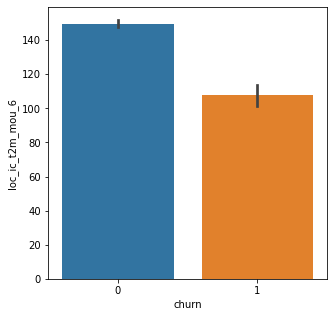

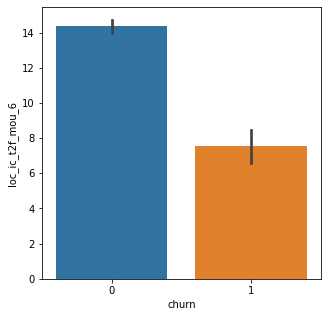

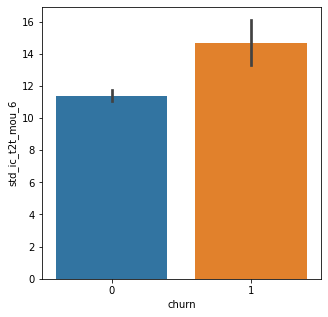

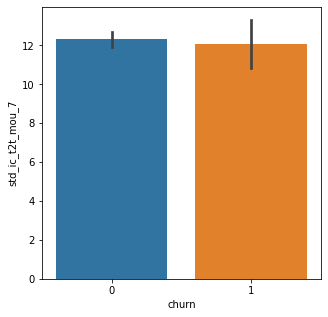

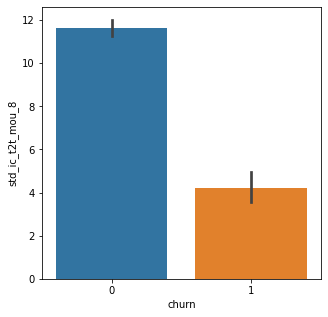

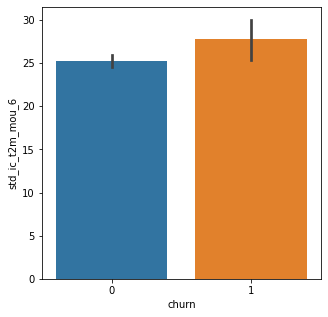

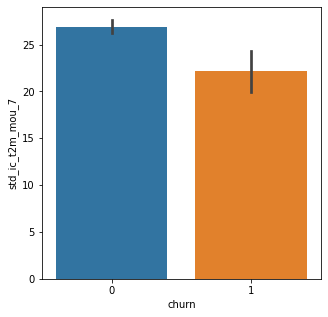

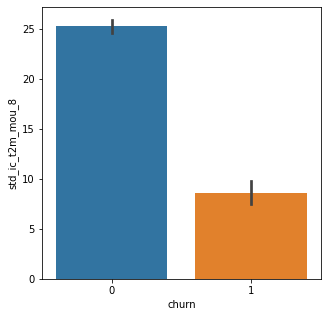

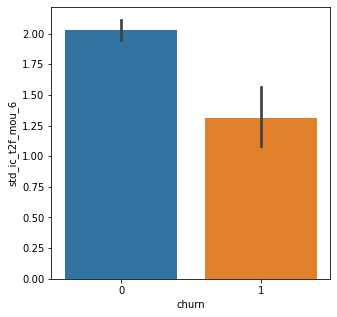

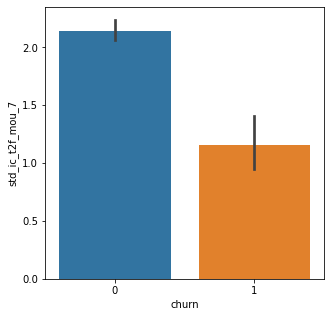

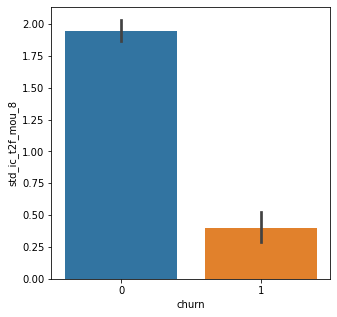

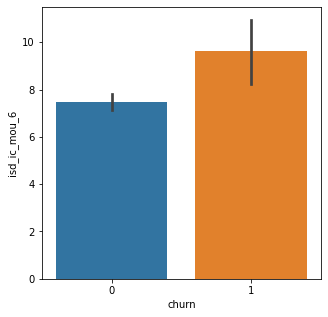

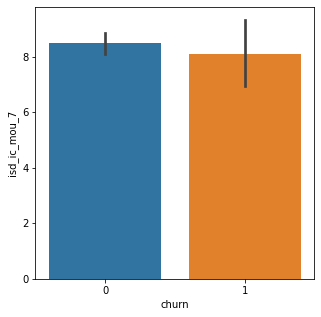

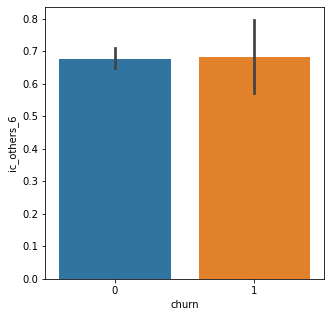

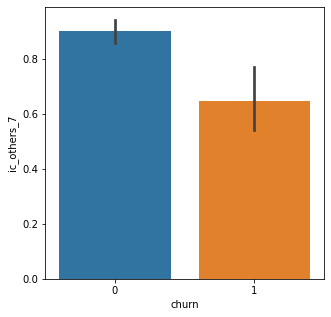

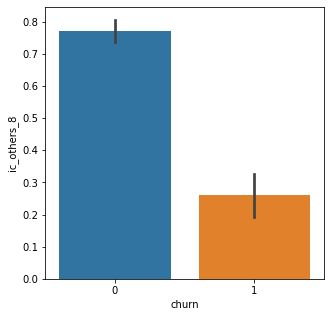

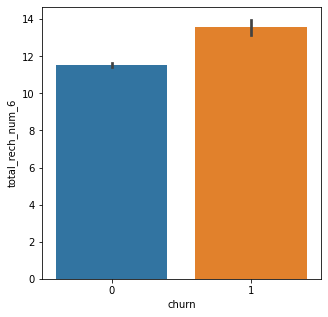

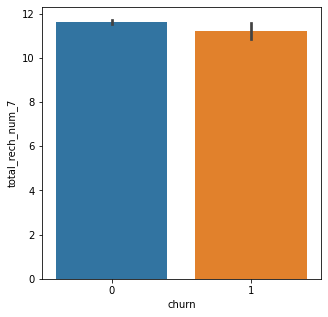

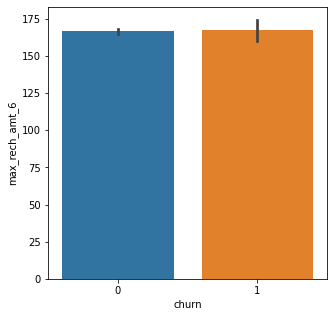

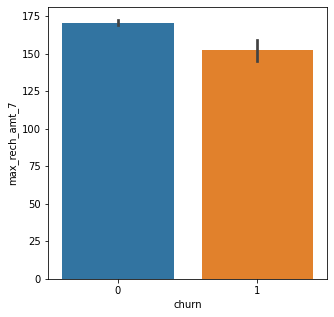

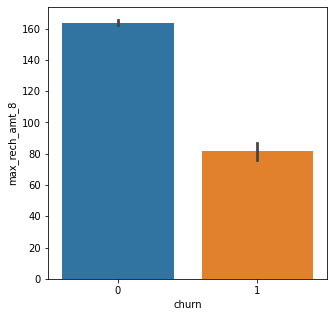

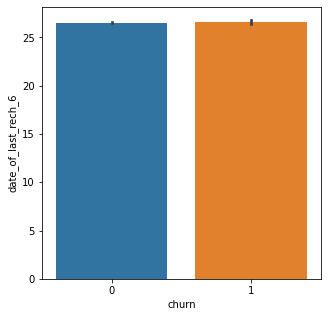

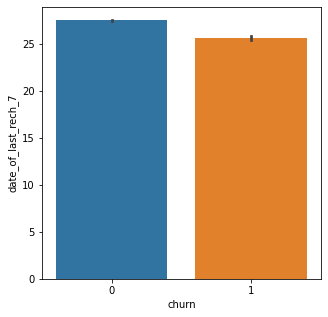

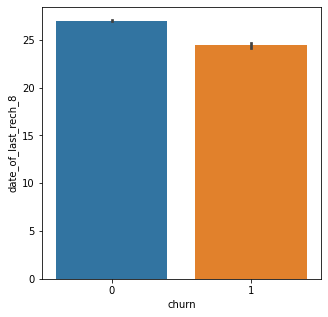

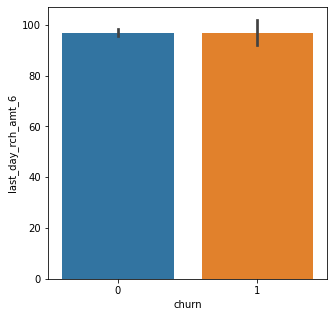

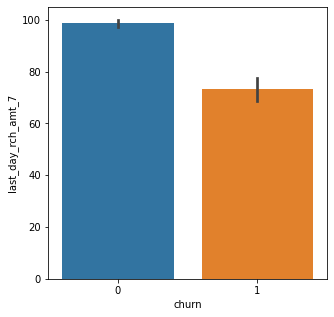

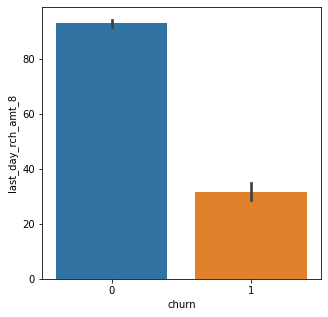

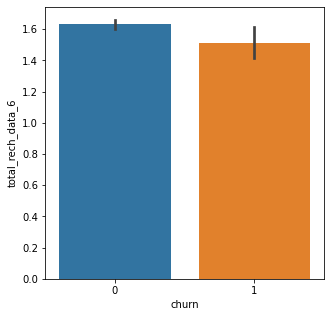

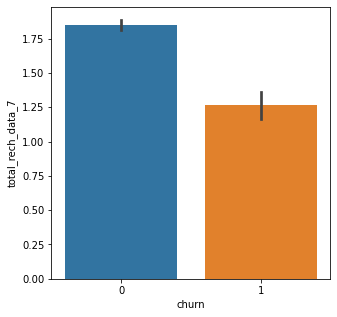

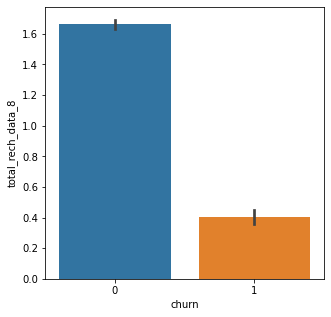

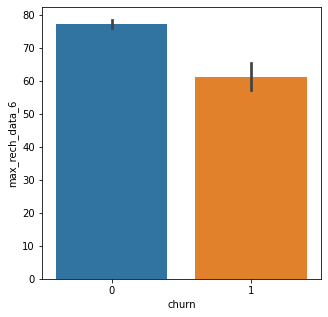

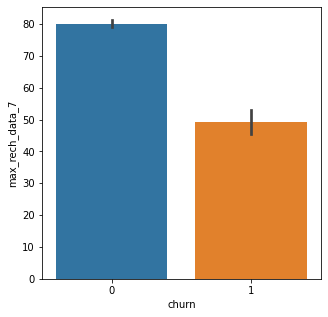

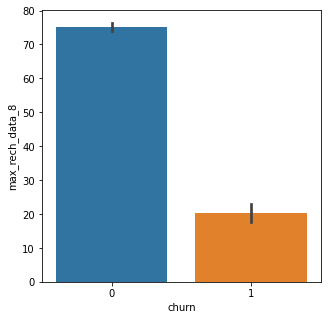

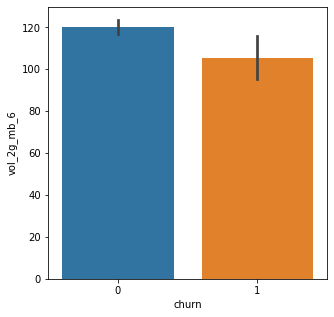

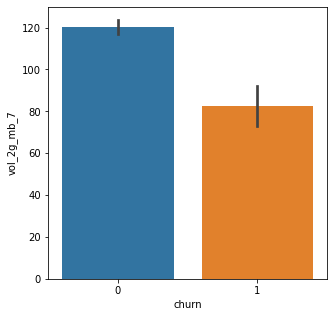

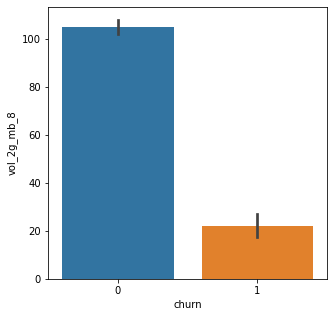

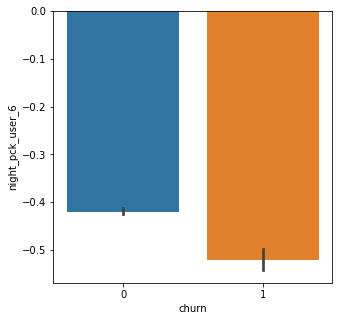

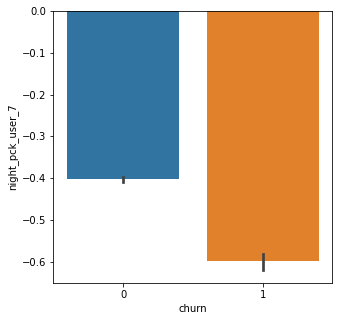

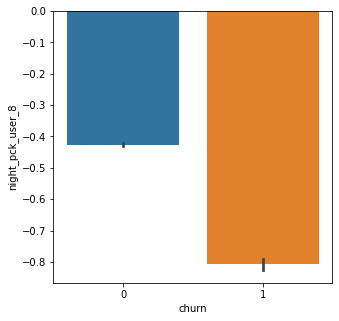

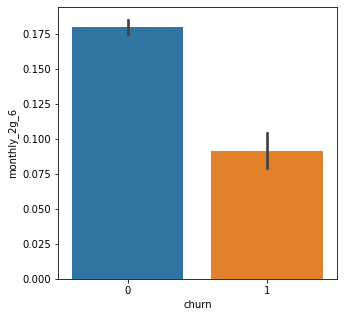

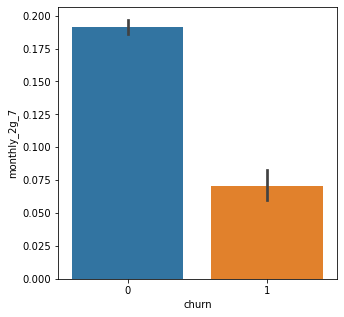

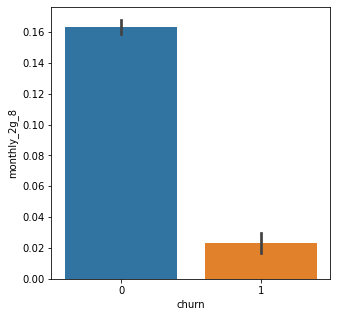

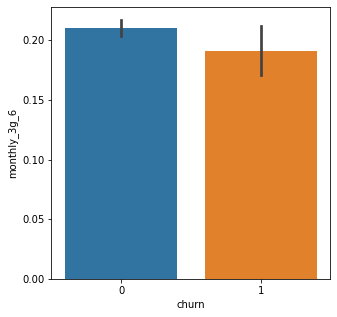

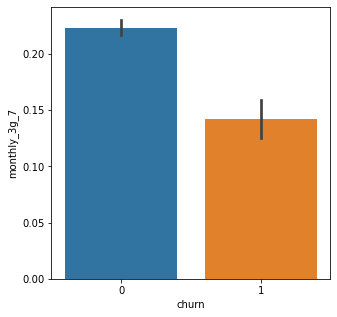

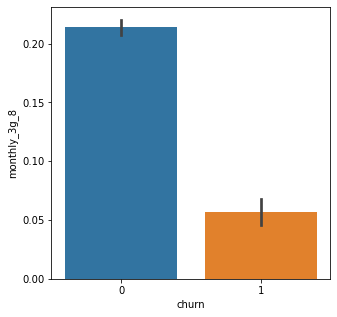

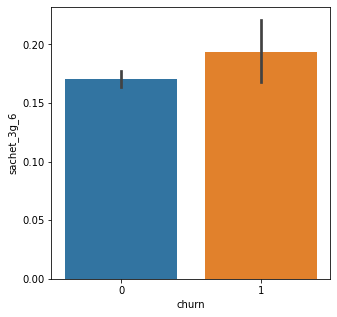

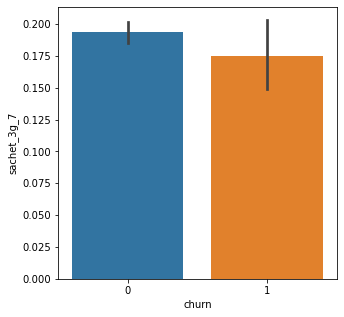

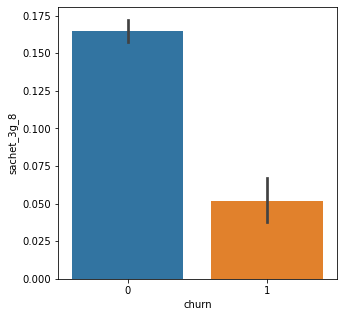

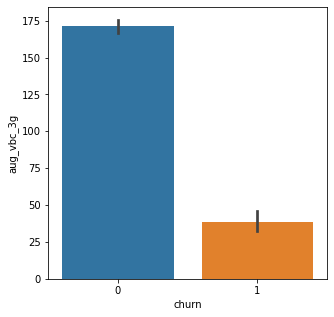

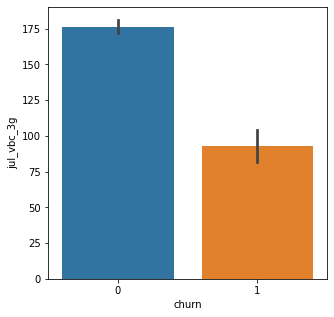

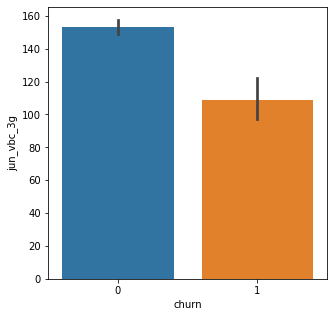

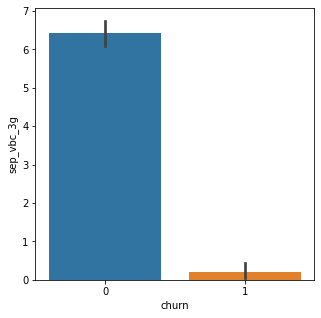

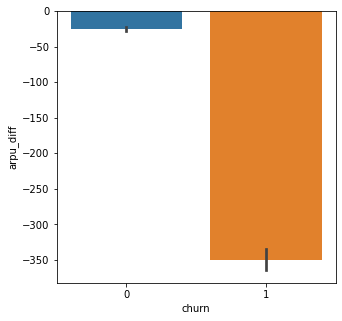

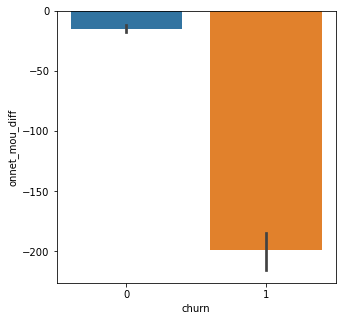

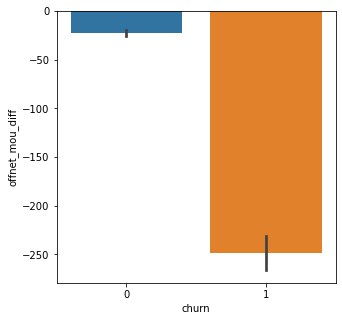

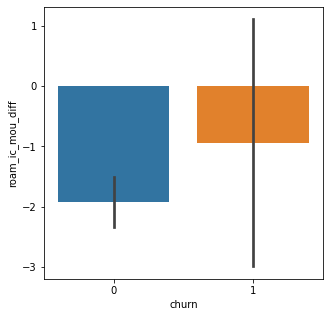

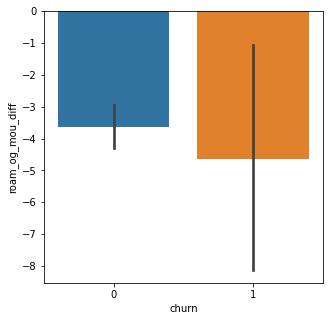

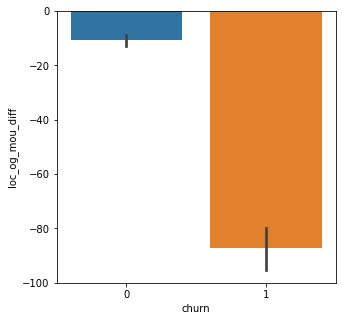

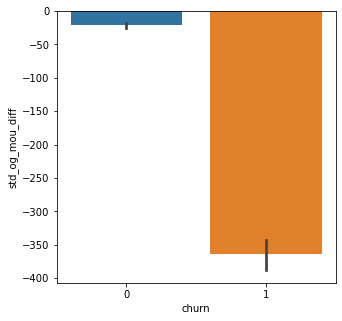

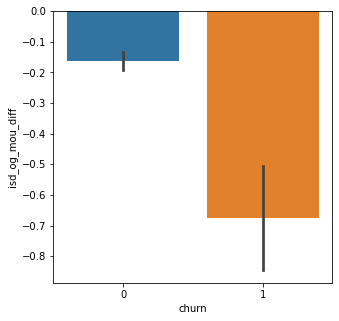

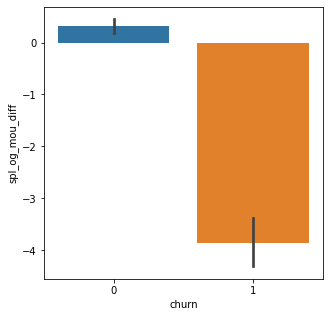

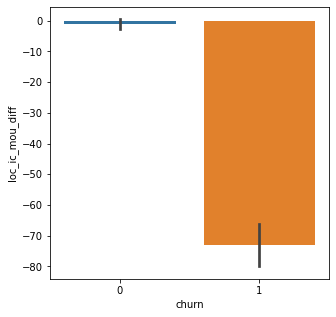

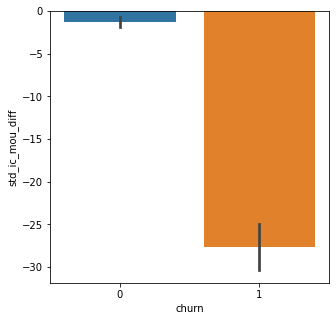

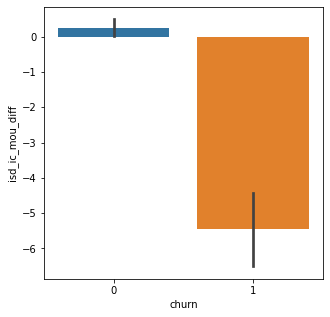

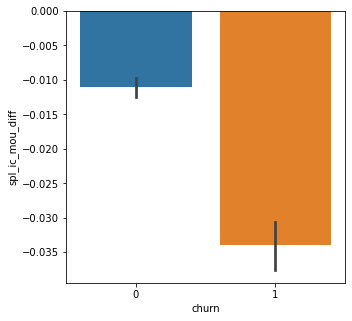

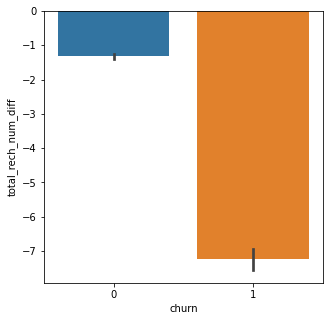

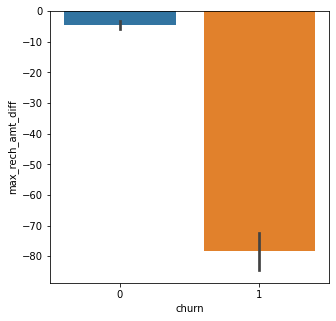

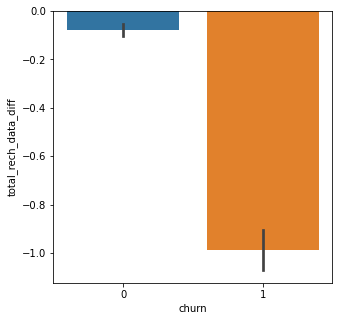

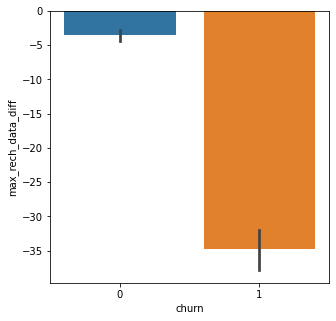

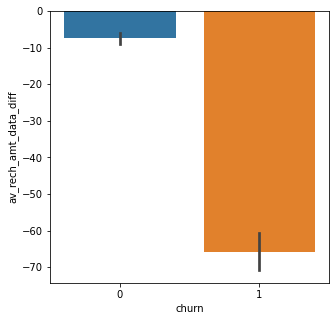

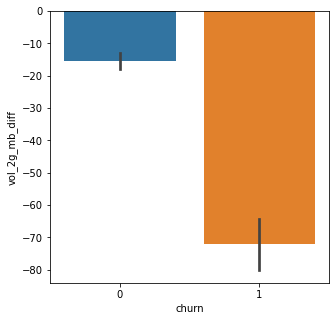

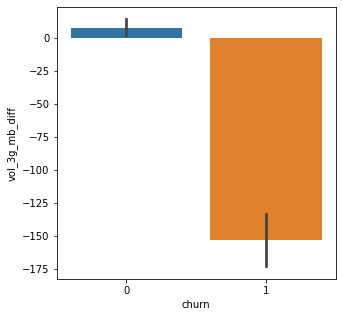

In [62]:
for col in num_col:
    plt.figure(figsize=(5, 5))
    sb.barplot(x='churn', y=col, data=df1)
    plt.show()

In [63]:
df1[cat_col] = df1[cat_col].astype('int64')

In [64]:
df1.night_pck_user_6.value_counts()

 0.0    16349
-1.0    13245
 1.0      407
Name: night_pck_user_6, dtype: int64

In [65]:
# aggregate the categorical variables
print(df1.groupby('night_pck_user_6').churn.mean())
print(df1.groupby('night_pck_user_7').churn.mean())
print(df1.groupby('night_pck_user_8').churn.mean())

night_pck_user_6
-1.0    0.098754
 0.0    0.066977
 1.0    0.093366
Name: churn, dtype: float64
night_pck_user_7
-1.0    0.114802
 0.0    0.055869
 1.0    0.061333
Name: churn, dtype: float64
night_pck_user_8
-1.0    0.141088
 0.0    0.028824
 1.0    0.026393
Name: churn, dtype: float64


In [66]:
# replace categories with aggregated values in each categorical column
mapping = {'night_pck_user_6' : {-1: 0.098754, 0: 0.066977, 1: 0.093366},
           'night_pck_user_7' : {-1: 0.114802, 0: 0.055869, 1: 0.061333},
           'night_pck_user_8' : {-1: 0.141088, 0: 0.028824, 1: 0.026393}
          }
df1.replace(mapping, inplace = True)

## Model Building

In [67]:
#Importing libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from imblearn.metrics import sensitivity_specificity_support
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [68]:
X = df1.drop(['churn','mobile_number'],axis=1)

y = df1['churn']

### Train-Test split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state = 100)

In [70]:
# print shapes of train and test sets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(22500, 102)
(22500,)
(7501, 102)
(7501,)


### Scaling

In [71]:
scaler = StandardScaler()

In [72]:
cols = X_train.columns.tolist()
X_train[cols] = scaler.fit_transform(X_train[cols])

In [73]:
cols = X_test.columns.tolist()
X_test[cols] = scaler.transform(X_test[cols])

### Model 1- PCA

In [74]:
pca = PCA(random_state=42)

In [75]:
pca.fit(X_train)

PCA(random_state=42)

In [76]:
pca.components_

array([[-6.76829711e-02, -3.94675615e-02,  2.92214721e-02, ...,
        -1.92491538e-02, -5.30533887e-04,  3.98452667e-02],
       [ 2.20481552e-01,  2.24202620e-01,  2.21569931e-01, ...,
        -1.54419453e-02,  6.52746220e-04,  9.15277879e-02],
       [-4.09531085e-02,  7.77048708e-02,  2.49671812e-01, ...,
         1.68919440e-02,  8.00946868e-03, -2.64133976e-02],
       ...,
       [ 0.00000000e+00, -2.75724103e-16,  2.53853951e-16, ...,
         1.56125113e-17,  8.23993651e-18,  1.90819582e-17],
       [ 0.00000000e+00, -3.28486615e-16,  2.90642580e-16, ...,
         5.11743425e-17, -8.67361738e-19, -7.63278329e-17],
       [ 0.00000000e+00,  1.83447008e-16, -2.25568596e-16, ...,
         2.95987193e-17, -4.00070602e-17,  1.17852776e-16]])

In [77]:
pca.explained_variance_ratio_

array([8.17682098e-02, 7.22066985e-02, 4.96956050e-02, 4.33182779e-02,
       3.46589391e-02, 3.18694056e-02, 3.00009290e-02, 2.79867097e-02,
       2.70168837e-02, 2.39004354e-02, 2.32299207e-02, 2.08704327e-02,
       1.99639246e-02, 1.86630270e-02, 1.80019991e-02, 1.75145493e-02,
       1.60440908e-02, 1.56177863e-02, 1.53991609e-02, 1.40687331e-02,
       1.33537440e-02, 1.31617332e-02, 1.26346157e-02, 1.23527145e-02,
       1.20421321e-02, 1.18384869e-02, 1.15373300e-02, 1.13541516e-02,
       1.12102568e-02, 1.09731852e-02, 1.03564081e-02, 1.00866689e-02,
       9.77756525e-03, 9.25900919e-03, 9.13643404e-03, 8.86880645e-03,
       8.21150081e-03, 7.96569946e-03, 7.49893050e-03, 7.43339865e-03,
       7.26919948e-03, 7.08258131e-03, 7.03849303e-03, 6.80452645e-03,
       6.31414835e-03, 6.21526597e-03, 6.16053987e-03, 5.73232796e-03,
       5.56164277e-03, 5.50489949e-03, 5.34537877e-03, 5.15238700e-03,
       5.07990037e-03, 4.96442571e-03, 4.74379189e-03, 4.65505448e-03,
      

In [78]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

Text(0, 0.5, 'Cumulative variance explained')

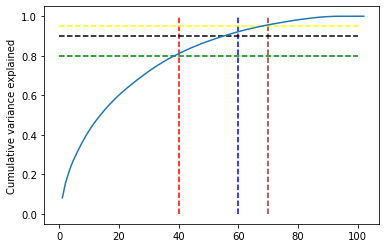

In [79]:
plt.vlines(x=40, ymax=1, ymin=0, colors="r", linestyles="--")
plt.vlines(x=60, ymax=1, ymin=0, colors="b", linestyles="--")
plt.vlines(x=70, ymax=1, ymin=0, colors="brown", linestyles="--")
plt.hlines(y=0.80, xmax=100, xmin=0, colors="g", linestyles="--")
plt.hlines(y=0.90, xmax=100, xmin=0, colors="black", linestyles="--")
plt.hlines(y=0.95, xmax=100, xmin=0, colors="yellow", linestyles="--")
plt.plot(range(1,len(var_cumu)+1), var_cumu)
plt.ylabel("Cumulative variance explained")

- 80% of the variance is defined by 40 variables
- 90% of the variance is defined by 60 variables
- 95% of the vrainace is defined by 70 varuables

### Model 2 - Logistic regression with PCA

In [80]:
pca_2 = IncrementalPCA(n_components=60)

In [81]:
X_train_pca = pca_2.fit_transform(X_train)

In [82]:
X_train_pca.shape

(22500, 60)

In [83]:
corrmat = np.corrcoef(X_train_pca.transpose())

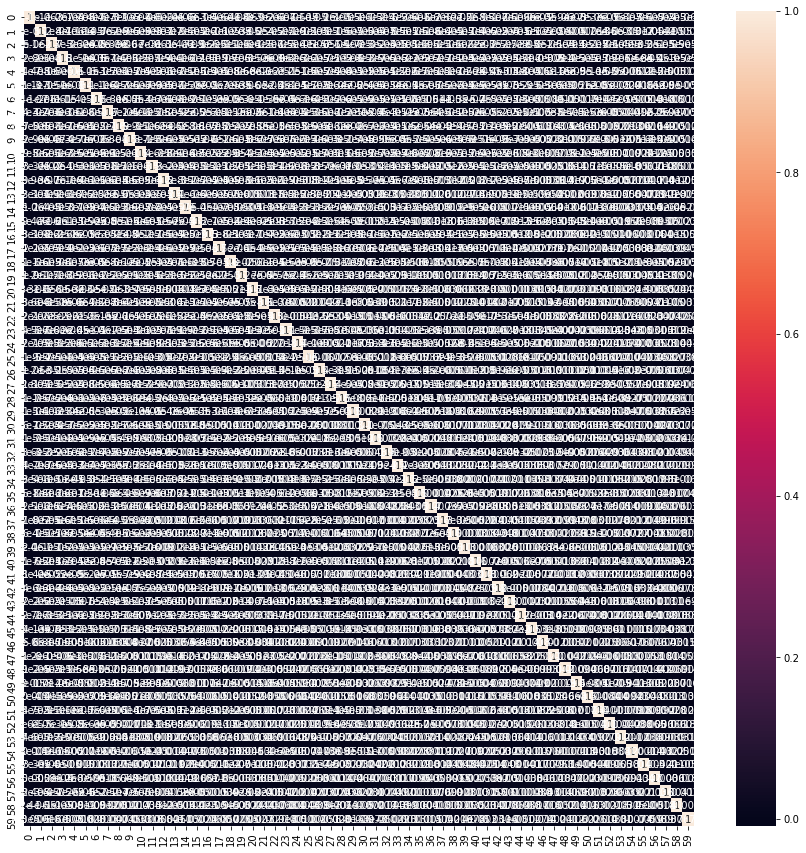

In [84]:
plt.figure(figsize=[15,15])
sb.heatmap(corrmat, annot=True)

In [85]:
X_test_pca = pca_2.transform(X_test)
X_test_pca.shape

(7501, 60)

In [86]:
learner_pca = LogisticRegression(class_weight='balanced')

In [87]:
model_pca = learner_pca.fit(X_train_pca, y_train)

In [88]:
# check area under curve
pred_probs_test = model_pca.predict_proba(X_test_pca)
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'0.89'

In [89]:
#Making prediction on the test data
pred_test = model_pca.predict_proba(X_test_pca)
y_pred = model_pca.predict(X_test_pca)

In [90]:
# print(classification_report(y_test,y_pred))
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.accuracy_score(y_test,y_pred))

[[5624 1241]
 [ 105  531]]
0.8205572590321291


In [91]:
# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

Sensitivity: 	0.83
Specificity: 	0.82


- Model has good sensitivity and specificity. So it is a good model.

#### Hyperparameter tuning in Model 2

In [93]:
# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression(class_weight="balanced")

# create pipeline
steps = [("logistic", logistic)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

# fit model
model.fit(X_train_pca, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('logistic',
                                        LogisticRegression(class_weight='balanced'))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

In [94]:
# cross validation results
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_logistic__penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.022710,0.007132,0.000000,0.000000,0.1,l1,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
1,0.362368,0.012246,0.016011,0.018415,0.1,l2,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'}",0.884474,0.877007,0.901880,0.881585,0.885706,0.886131,0.008424,8
2,0.040496,0.019731,0.000000,0.000000,0.5,l1,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
3,0.313861,0.031627,0.010370,0.018349,0.5,l2,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'}",0.884517,0.877107,0.901919,0.881628,0.885720,0.886178,0.008411,7
4,0.045051,0.027756,0.000000,0.000000,1,l1,"{'logistic__C': 1, 'logistic__penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,11
5,0.331971,0.019572,0.003923,0.006051,1,l2,"{'logistic__C': 1, 'logistic__penalty': 'l2'}",0.884525,0.877135,0.901927,0.881629,0.885723,0.886188,0.008407,6
6,0.031242,0.017113,0.000000,0.000000,2,l1,"{'logistic__C': 2, 'logistic__penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,12
7,0.339216,0.042770,0.021870,0.027237,2,l2,"{'logistic__C': 2, 'logistic__penalty': 'l2'}",0.884523,0.877137,0.901931,0.881630,0.885723,0.886189,0.008409,5
8,0.037491,0.021191,0.000000,0.000000,3,l1,"{'logistic__C': 3, 'logistic__penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,13
9,0.343669,0.040736,0.000000,0.000000,3,l2,"{'logistic__C': 3, 'logistic__penalty': 'l2'}",0.884527,0.877141,0.901928,0.881629,0.885728,0.886190,0.008407,4


In [95]:
#print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.8861930197118284
Best hyperparameters:  {'logistic__C': 10, 'logistic__penalty': 'l2'}


In [96]:
model = LogisticRegression(class_weight="balanced", C = 10, penalty = 'l2')
model.fit(X_train_pca, y_train)

LogisticRegression(C=10, class_weight='balanced')

In [97]:
y_pred = model.predict(X_test_pca)

In [98]:
# check area under curve
y_pred_prob = model.predict_proba(X_test_pca)[:, 1]
"{:2.2}".format(metrics.roc_auc_score(y_test, y_pred_prob))

'0.89'

In [99]:
#Making prediction on the test data
pred_test = model.predict_proba(X_test_pca)
y_pred = model.predict(X_test_pca)

In [100]:
# print(classification_report(y_test,y_pred))
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.accuracy_score(y_test,y_pred))

[[5624 1241]
 [ 105  531]]
0.8205572590321291


In [101]:
# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

Sensitivity: 	0.83
Specificity: 	0.82


- Model has good sensitivity and specificity. So it is a good model.

### Model 3 - Random Forest

In [ ]:
# random forest - the class weight is used to handle class imbalance - it adjusts the cost function
forest = RandomForestClassifier(class_weight='balanced', n_jobs = -1)

# hyperparameter tunning
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 'sqrt', 'log2'],
         'max_depth': [8,10],
    'min_samples_leaf': range(100, 200, 100),
    'min_samples_split': range(200, 400, 100),
    'n_estimators': range(200, 400, 100), }

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model2 = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

# fit model
model2.fit(X_train_pca, y_train)

In [ ]:
# print best hyperparameters
print("Best AUC: ", model2.best_score_)
print("Best hyperparameters: ", model2.best_params_)

In [ ]:
model2 = RandomForestClassifier(class_weight = "balanced", criterion= "entropy", max_features="sqrt", max_depth=10,
                                min_samples_leaf = 100, min_samples_split=200, n_estimators= 200)
model2.fit(X_train_pca, y_train)

In [ ]:
y_pred = model2.predict(X_test_pca)

In [ ]:
# check area under curve
y_pred_prob = model2.predict_proba(X_test_pca)[:, 1]
"{:2.2}".format(metrics.roc_auc_score(y_test, y_pred_prob))

In [ ]:
#Making prediction on the test data
pred_test = model2.predict_proba(X_test_pca)
y_pred = model2.predict(X_test_pca)

In [ ]:
# print(classification_report(y_test,y_pred))
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.accuracy_score(y_test,y_pred))

In [ ]:
# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

- Sensitivity is poor. So, the model is not so good.

### Model 4 - Decision Tree with PCA

In [102]:
# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5, class_weight='balanced')
dt_default.fit(X_train_pca,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5)

In [103]:
y_pred = dt_default.predict(X_test_pca)

In [104]:
# check area under curve
y_pred_prob = dt_default.predict_proba(X_test_pca)[:, 1]
"{:2.2}".format(metrics.roc_auc_score(y_test, y_pred_prob))

'0.84'

In [105]:
#Making prediction on the test data
pred_test = dt_default.predict_proba(X_test_pca)
y_pred = dt_default.predict(X_test_pca)

In [106]:
# print(classification_report(y_test,y_pred))
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.accuracy_score(y_test,y_pred))

[[5751 1114]
 [ 162  474]]
0.8298893480869217


In [107]:
# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

Sensitivity: 	0.75
Specificity: 	0.84


- Sensitivity is poor for this model as well. So, the model is not so good.

#### Hyperparameter tuning for model 4

In [108]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(100, 200, 50),
    'min_samples_split': range(100, 200, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier(class_weight='balanced')
model_dt = GridSearchCV(estimator = dtree, param_grid = param_grid, refit='recall_score',
                          cv = n_folds, verbose = 1, n_jobs = -1)

# Fit the grid search to the data
model_dt.fit(X_train_pca,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(100, 200, 50),
                         'min_samples_split': range(100, 200, 50)},
             refit='recall_score', verbose=1)

In [109]:
# print best hyperparameters
print("Best recall score: ", model_dt.best_score_)
print("Best hyperparameters: ", model_dt.best_params_)

Best recall score:  0.8054222222222223
Best hyperparameters:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 100, 'min_samples_split': 100}


In [110]:
model_dt = DecisionTreeClassifier(max_depth=5, class_weight='balanced',
                                  min_samples_leaf = 100 , min_samples_split = 100, criterion="gini")
model_dt.fit(X_train_pca,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5,
                       min_samples_leaf=100, min_samples_split=100)

In [111]:
y_pred = model_dt.predict(X_test_pca)

In [112]:
# check area under curve
y_pred_prob = model_dt.predict_proba(X_test_pca)[:, 1]
"{:2.2}".format(metrics.roc_auc_score(y_test, y_pred_prob))

'0.85'

In [113]:
#Making prediction on the test data
pred_test = model_dt.predict_proba(X_test_pca)
y_pred = model_dt.predict(X_test_pca)

In [114]:
# print(classification_report(y_test,y_pred))
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.accuracy_score(y_test,y_pred))

[[5735 1130]
 [ 161  475]]
0.8278896147180376


In [115]:
# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

Sensitivity: 	0.75
Specificity: 	0.84


- Sensitivity is poor for this model as well. So, the model is not so good.

## Feature Selection

In [116]:
rf_model = RandomForestClassifier(class_weight = "balanced", criterion= "entropy", max_features="sqrt", max_depth=10,
                                min_samples_leaf = 100, min_samples_split= 200 , n_estimators= 200)
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, max_features='sqrt', min_samples_leaf=100,
                       min_samples_split=200, n_estimators=200)

In [117]:
feature_names = df1.drop(['churn','mobile_number'], axis=1).columns

importance = rf_model.feature_importances_

# create dataframe
feature_importance = pd.DataFrame({'variables': feature_names, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
feature_importance

,variables,importance_percentage
0,last_day_rch_amt_8,9.155739
1,arpu_diff,7.964014
2,max_rech_amt_8,7.777696
3,arpu_8,7.328199
4,date_of_last_rech_8,3.916080
5,roam_ic_mou_8,3.757195
6,std_ic_t2m_mou_8,3.459416
7,vol_2g_mb_8,3.374674
8,max_rech_amt_diff,3.360815
9,total_rech_data_8,3.059548


In [118]:
# extract top 10 features
top_n = 10
top_features = feature_importance.variables[0:top_n]

In [119]:
top_features = top_features.tolist()
top_features

['last_day_rch_amt_8',
 'arpu_diff',
 'max_rech_amt_8',
 'arpu_8',
 'date_of_last_rech_8',
 'roam_ic_mou_8',
 'std_ic_t2m_mou_8',
 'vol_2g_mb_8',
 'max_rech_amt_diff',
 'total_rech_data_8']

In [120]:
X_train = X_train[top_features]
X_test = X_test[top_features]

In [121]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(22500, 10)
(7501, 10)
(22500,)
(7501,)


In [122]:
# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression(class_weight="balanced")

# create pipeline
steps = [("logistic", logistic)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

# fit model
model.fit(X_train_pca, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('logistic',
                                        LogisticRegression(class_weight='balanced'))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

In [123]:
#print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.8861930197118284
Best hyperparameters:  {'logistic__C': 10, 'logistic__penalty': 'l2'}


In [124]:
final_model = LogisticRegression(class_weight="balanced", C = 10, penalty = 'l2')
final_model.fit(X_train, y_train)

LogisticRegression(C=10, class_weight='balanced')

In [125]:
y_pred = final_model.predict(X_test)

In [126]:
# check area under curve
y_pred_prob = final_model.predict_proba(X_test)[:, 1]
"{:2.2}".format(metrics.roc_auc_score(y_test, y_pred_prob))

'0.86'

In [127]:
#Making prediction on the test data
pred_test = final_model.predict_proba(X_test)
y_pred = final_model.predict(X_test)

In [128]:
# print(classification_report(y_test,y_pred))
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.accuracy_score(y_test,y_pred))

[[5469 1396]
 [ 121  515]]
0.7977602986268497


In [129]:
# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

Sensitivity: 	0.81
Specificity: 	0.8


### Analysis

- ARPU 7th and 8th - Average Revenue Per User decreases from 6th to 7th month to 8th month as most of the users are churned by 8th month.

- date_of_last_rech_8 - Most of the Users are churned between 25th to 31st of the month. Hence providing offers prior to 25th can reduce the churn. Send out periodic offers to customers between 15th of the month to 25th of the month.

- last_day_rch_amt_8 - Lower the last day recharge amount higher the churn rate. Focus on customers whos last day recharge amount has decrased. Specialy for customers without any recharge amount.

- roam_ic_mou_8 - Higher the incoming roaming amount, higher is the churn rate. Focus on customers whose incoming roaming amount has increased, because they are likely to churn.

- std_ic_t2m_mou_8 - Lower the STD incoming call, higher is the churn rate. Focus on customers whose STD incoming call amount has decreased for that month.

- max_rech_amt_8- Focus on the customer whoes Avg max recharge amount has been decreased
- Telecom company needs to pay attention to the roaming rates. They need to provide good offers to the customers who are using services from a roaming zone.
- The company needs to focus on the STD and ISD rates. Perhaps, the rates are too high. Provide them with some kind of STD and ISD packages.